## Load and Transform Multiple Files

In [7]:
import pandas as pd
import os

def clean_and_transform_html_table_to_tidy_format(file_path):
    try:
        # Attempt to read the tables from the HTML file
        tables = pd.read_html(file_path)
        
        # Check if any tables were found
        if not tables:
            print(f"No table found in {file_path}. Skipping.")
            return None
        
        df = tables[0]  # Assuming the table of interest is the first one

        # Adjusting column names (if necessary, based on the structure of your table)
        df.columns = df.columns.droplevel([0, 1])  # Adjust according to the level of headers
        df.columns = ['Item', 'Month', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'ACT', 'NT', 'Total']
        df = df.drop([0])  # Drop the first row which is part of the header in the HTML table

        # Removing the term "Services" from column headers
        df.columns = [col.replace(' Services', '') for col in df.columns]

        # Cleaning the DataFrame by removing rows that are not actual data
        df = df[df['Month'] != 'Month']  # Remove rows where 'Month' column has "Month" as its value
        df = df.drop_duplicates(keep='first').reset_index(drop=True)  # Remove duplicate rows if any

        # Remove rows where 'Month' or 'State' has the "Total" category after the melt operation
        tidy_df = df.melt(id_vars=["Item", "Month"], var_name="State", value_name="Value")
        
        # Drop rows where 'Month' or 'State' is "Total"
        tidy_df = tidy_df[(tidy_df['Month'] != 'Total') & (tidy_df['State'] != 'Total')]

        # Convert the 'Month' field from "MMMYYYY" format to a datetime format showing the month
        tidy_df['Month'] = pd.to_datetime(tidy_df['Month'], format='%b%Y', errors='coerce')

        # Clean the 'Value' column: remove non-numeric characters and convert to numeric
        tidy_df['Value'] = tidy_df['Value'].replace('[^0-9.-]', '', regex=True).astype(float)

        return tidy_df
    
    except ValueError:
        print(f"No valid table found in {file_path}. Skipping.")
        return None

def process_multiple_files(folder_path):
    # List all files in the given folder
    all_files = os.listdir(folder_path)
    html_files = [file for file in all_files if file.endswith('.html')]

    # Initialize an empty DataFrame to hold all combined data
    combined_df = pd.DataFrame()

    # Process each HTML file
    for file in html_files:
        file_path = os.path.join(folder_path, file)
        tidy_df = clean_and_transform_html_table_to_tidy_format(file_path)
        
        # Only combine if the DataFrame is not None
        if tidy_df is not None:
            combined_df = pd.concat([combined_df, tidy_df], ignore_index=True)

    return combined_df

# Specify the folder containing your HTML files
# Make sure to replace this path with the actual path to your folder containing HTML files
folder_path = '/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBS Files/Services Data - 202411'

# Use the function to process all HTML files in the folder and combine the data
combined_data = process_multiple_files(folder_path)

# Optionally, save the combined DataFrame to a CSV file
combined_csv_path = 'MBSGeneticsBenefit_202410.csv'
combined_data.to_csv(combined_csv_path, index=False)

# Save the combined DataFrame as a Feather file
combined_feather_path = 'MBSGeneticsBenefit_202410.feather'
combined_data.to_feather(combined_feather_path)

print(f"Combined data saved to {combined_csv_path} and {combined_feather_path}")


No valid table found in /mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBS Files/Services Data - 202411/Item_73295.html. Skipping.
No valid table found in /mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBS Files/Services Data - 202411/Item_73299.html. Skipping.
No valid table found in /mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBS Files/Services Data - 202411/Item_73302.html. Skipping.
No valid table found in /mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBS Files/Services Data - 202411/Item_73306.html. Skipping.
No valid table found in /mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisa

## Model Data

### Overall Data

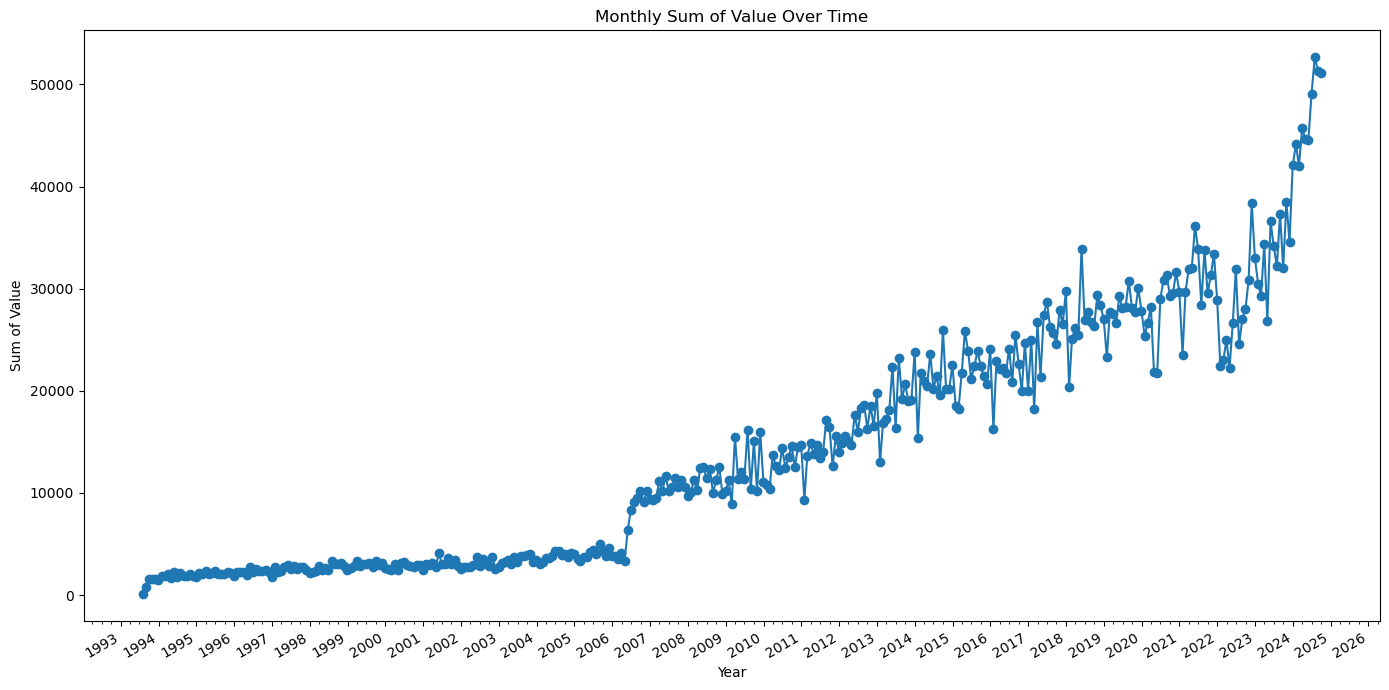

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Aggregate "Value" by quarter across all items and states
quarterly_data = data['Value'].resample('ME').sum()

# Plotting the resampled data
plt.figure(figsize=(14, 7))
plt.plot(quarterly_data.index, quarterly_data, marker='o', linestyle='-')

plt.title('Monthly Sum of Value Over Time')
plt.xlabel('Year')
plt.ylabel('Sum of Value')

# Set x-axis major locator to every year and minor locator to every quarter
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve display of x-axis labels
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()


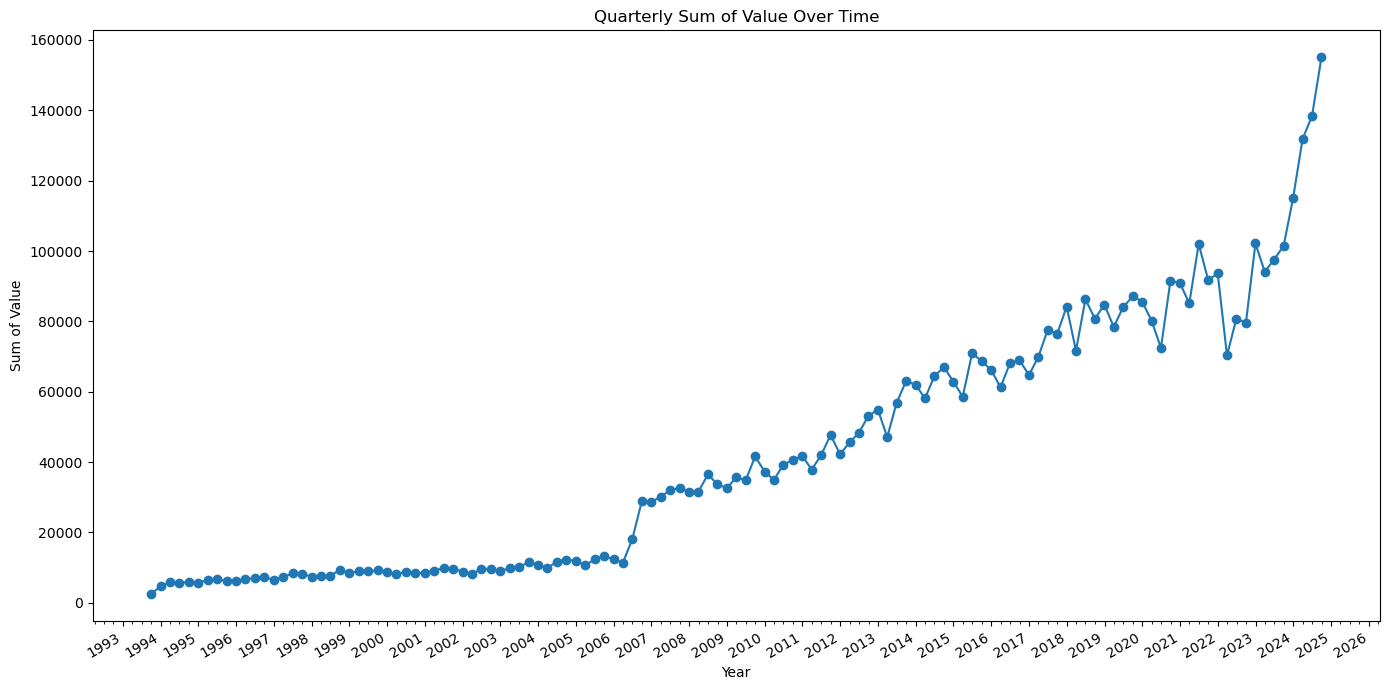

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Aggregate "Value" by quarter across all items and states
quarterly_data = data['Value'].resample('QE').sum()

# Plotting the resampled data
plt.figure(figsize=(14, 7))
plt.plot(quarterly_data.index, quarterly_data, marker='o', linestyle='-')

plt.title('Quarterly Sum of Value Over Time')
plt.xlabel('Year')
plt.ylabel('Sum of Value')

# Set x-axis major locator to every year and minor locator to every quarter
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve display of x-axis labels
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()


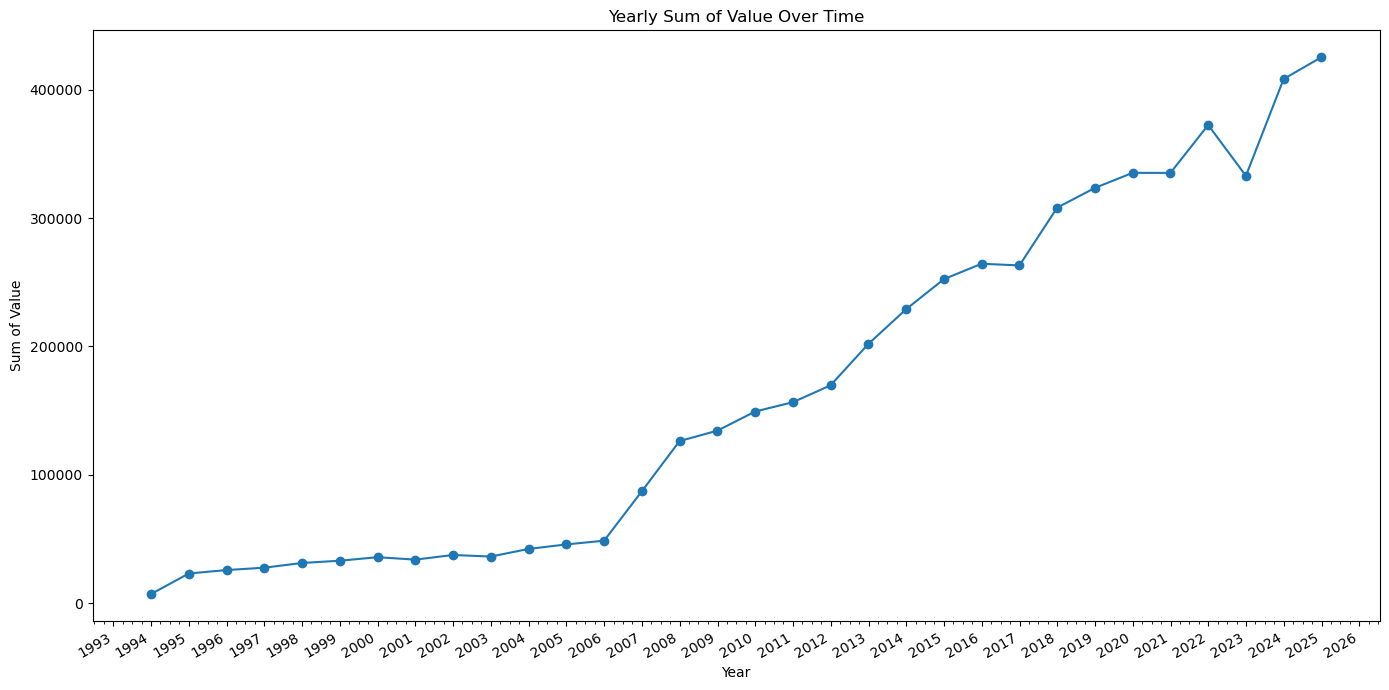

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Aggregate "Value" by quarter across all items and states
quarterly_data = data['Value'].resample('YE').sum()

# Plotting the resampled data
plt.figure(figsize=(14, 7))
plt.plot(quarterly_data.index, quarterly_data, marker='o', linestyle='-')

plt.title('Yearly Sum of Value Over Time')
plt.xlabel('Year')
plt.ylabel('Sum of Value')

# Set x-axis major locator to every year and minor locator to every quarter
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve display of x-axis labels
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()


### By Item

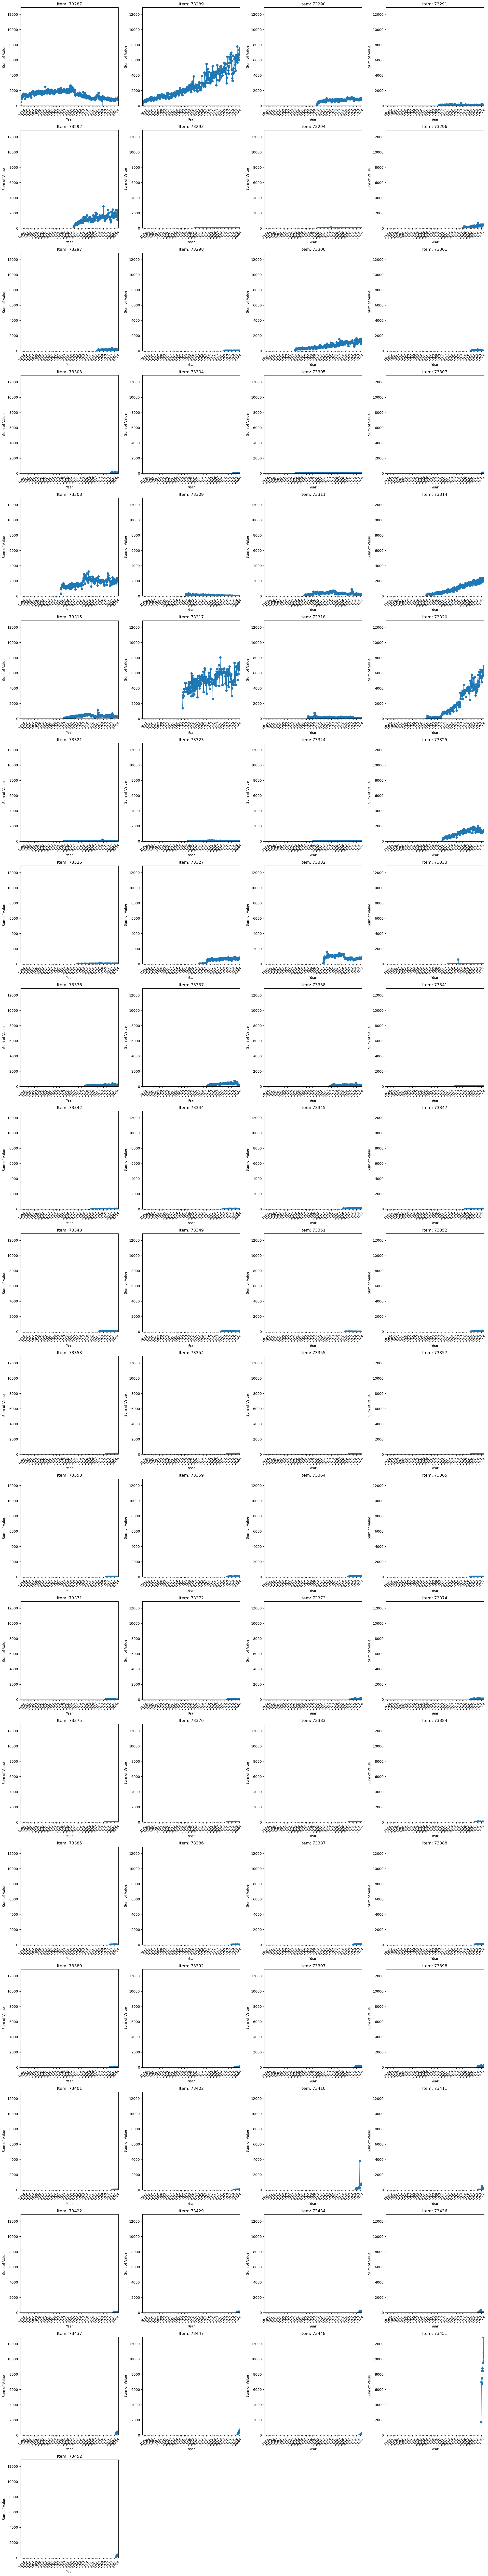

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Get unique items
unique_items = data['Item'].unique()
num_items = len(unique_items)

# Calculate global x-axis range
all_data_resampled = data['Value'].resample('ME').sum()
x_min, x_max = all_data_resampled.index.min(), all_data_resampled.index.max()

# Calculate the global y-axis maximum based on the highest peak after resampling
y_max = data.groupby('Item')['Value'].resample('ME').sum().max()
y_min = 0  # Assuming y-axis starts at 0 for better comparison

# Create subplots
fig, axes = plt.subplots(nrows=(num_items // 4) + (num_items % 4 > 0), ncols=4, figsize=(20, 5 * ((num_items // 4) + (num_items % 4 > 0))))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each item in a subplot
for i, item in enumerate(unique_items):
    item_data = data[data['Item'] == item]['Value'].resample('ME').sum()

    axes[i].plot(item_data.index, item_data, marker='o', linestyle='-')
    axes[i].set_title(f'Item: {item}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Sum of Value')

    # Set the same x-axis and y-axis limits for each subplot
    axes[i].set_xlim([x_min, x_max])
    axes[i].set_ylim([y_min, y_max])

    # Set x-axis major locator to every year and minor locator to every quarter
    axes[i].xaxis.set_major_locator(mdates.YearLocator())
    axes[i].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Improve display of x-axis labels
    for label in axes[i].get_xticklabels(which='both'):
        label.set_rotation(45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


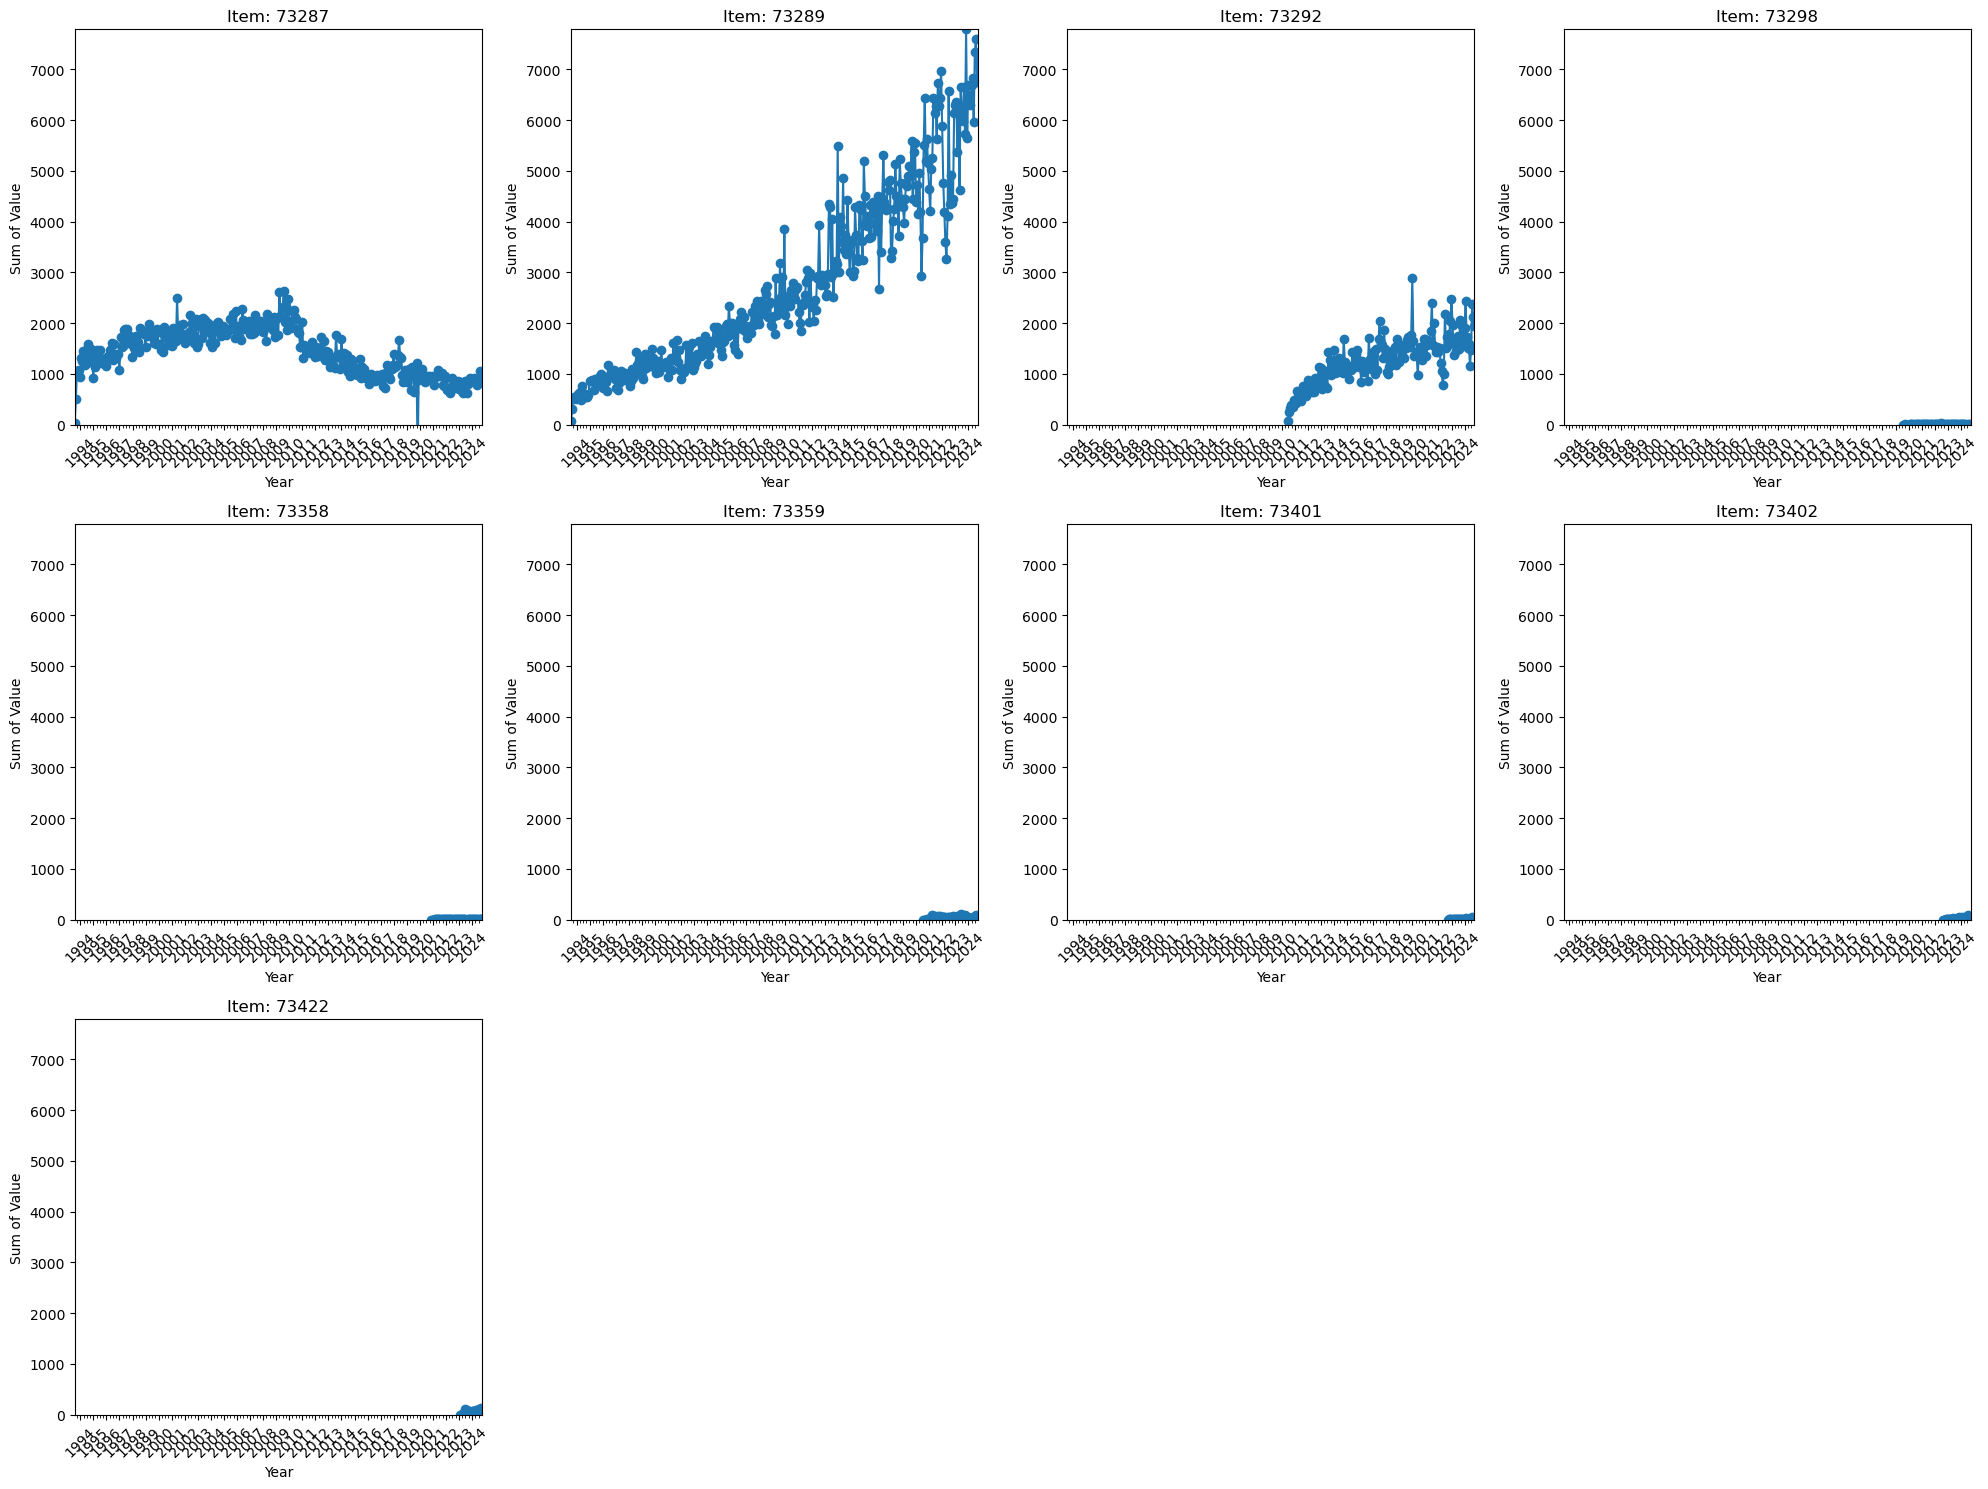

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73287', '73289', '73292', '73298', '73299',
    '73358', '73359', '73360', '73395', '73401',
    '73402', '73422', '73425', '73426', '73442',
    '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)]

# Get unique items from the filtered data
unique_items = filtered_data['Item'].unique()
num_items = len(unique_items)

# Calculate global x-axis range
all_data_resampled = filtered_data['Value'].resample('ME').sum()
x_min, x_max = all_data_resampled.index.min(), all_data_resampled.index.max()

# Calculate the global y-axis maximum based on the highest peak after resampling
y_max = filtered_data.groupby('Item')['Value'].resample('ME').sum().max()
y_min = 0  # Assuming y-axis starts at 0 for better comparison

# Create subplots
fig, axes = plt.subplots(nrows=(num_items // 4) + (num_items % 4 > 0), ncols=4, figsize=(20, 5 * ((num_items // 4) + (num_items % 4 > 0))))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each item in a subplot
for i, item in enumerate(unique_items):
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum()

    axes[i].plot(item_data.index, item_data, marker='o', linestyle='-')
    axes[i].set_title(f'Item: {item}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Sum of Value')

    # Set the same x-axis and y-axis limits for each subplot
    axes[i].set_xlim([x_min, x_max])
    axes[i].set_ylim([y_min, y_max])

    # Set x-axis major locator to every year and minor locator to every quarter
    axes[i].xaxis.set_major_locator(mdates.YearLocator())
    axes[i].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Improve display of x-axis labels
    for label in axes[i].get_xticklabels(which='both'):
        label.set_rotation(45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


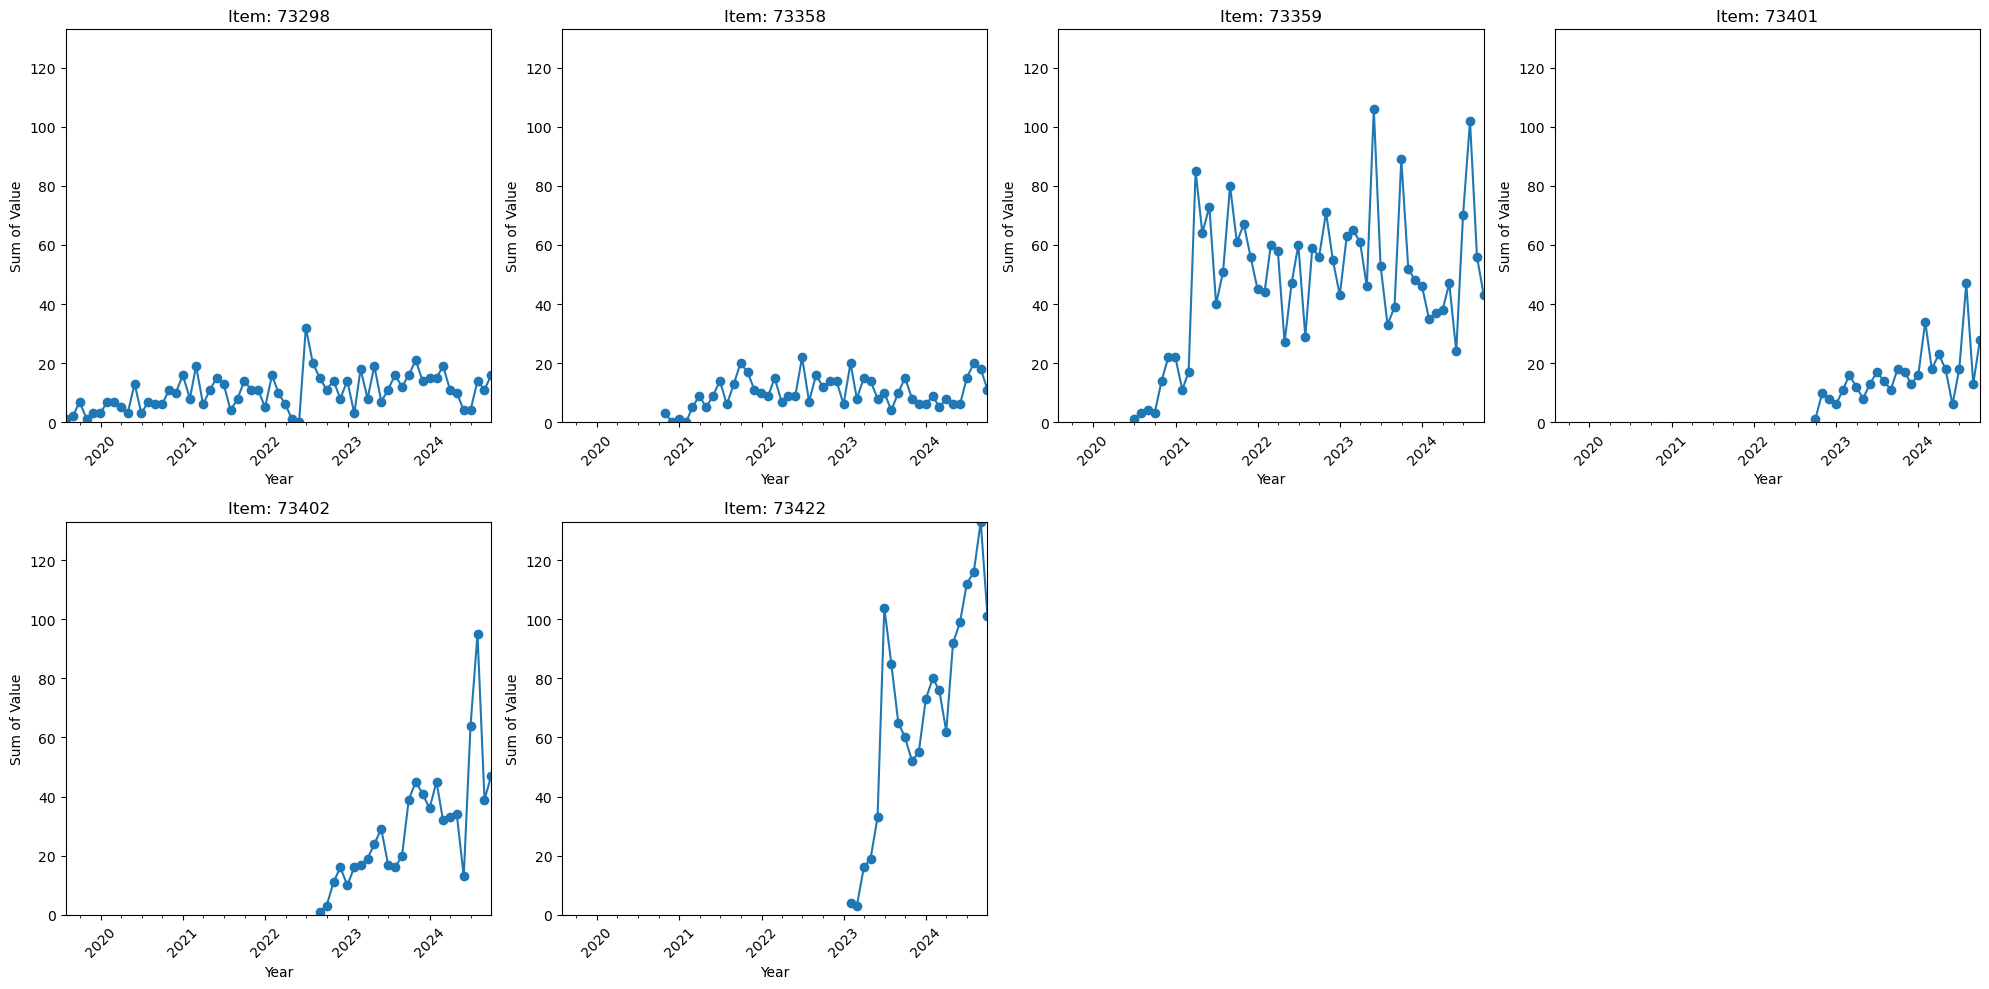

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73298', '73299',
    '73358', '73359', '73360', '73395', '73401',
    '73402', '73422', '73425', '73426', '73442',
    '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)]

# Get unique items from the filtered data
unique_items = filtered_data['Item'].unique()
num_items = len(unique_items)

# Calculate global x-axis range
all_data_resampled = filtered_data['Value'].resample('ME').sum()
x_min, x_max = all_data_resampled.index.min(), all_data_resampled.index.max()

# Calculate the global y-axis maximum based on the highest peak after resampling
y_max = filtered_data.groupby('Item')['Value'].resample('ME').sum().max()
y_min = 0  # Assuming y-axis starts at 0 for better comparison

# Create subplots
fig, axes = plt.subplots(nrows=(num_items // 4) + (num_items % 4 > 0), ncols=4, figsize=(20, 5 * ((num_items // 4) + (num_items % 4 > 0))))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each item in a subplot
for i, item in enumerate(unique_items):
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum()

    axes[i].plot(item_data.index, item_data, marker='o', linestyle='-')
    axes[i].set_title(f'Item: {item}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Sum of Value')

    # Set the same x-axis and y-axis limits for each subplot
    axes[i].set_xlim([x_min, x_max])
    axes[i].set_ylim([y_min, y_max])

    # Set x-axis major locator to every year and minor locator to every quarter
    axes[i].xaxis.set_major_locator(mdates.YearLocator())
    axes[i].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Improve display of x-axis labels
    for label in axes[i].get_xticklabels(which='both'):
        label.set_rotation(45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


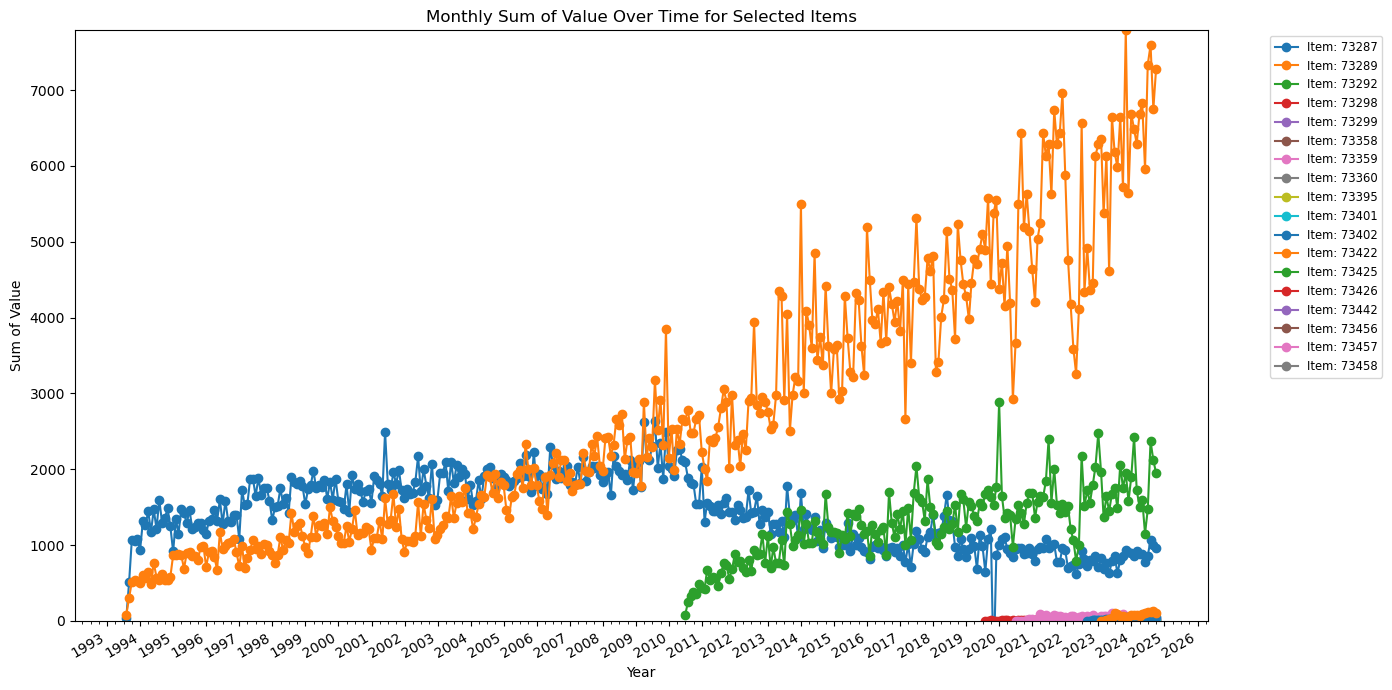

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73287', '73289', '73292', '73298', '73299',
    '73358', '73359', '73360', '73395', '73401',
    '73402', '73422', '73425', '73426', '73442',
    '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)]

# Calculate the global y-axis maximum based on the highest peak after resampling
y_max = filtered_data.groupby('Item')['Value'].resample('ME').sum().max()
y_min = 0  # Assuming y-axis starts at 0 for better comparison

# Plotting all items on the same plot
plt.figure(figsize=(14, 7))

# Plot each item
for item in items_to_include:
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum()
    plt.plot(item_data.index, item_data, marker='o', linestyle='-', label=f'Item: {item}')

# Setting title and labels
plt.title('Monthly Sum of Value Over Time for Selected Items')
plt.xlabel('Year')
plt.ylabel('Sum of Value')
plt.ylim([y_min, y_max])

# Set x-axis major locator to every year and minor locator to every quarter
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve display of x-axis labels
plt.gcf().autofmt_xdate()

# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

plt.tight_layout()
plt.show()


/tmp/ipykernel_13832/2729456970.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



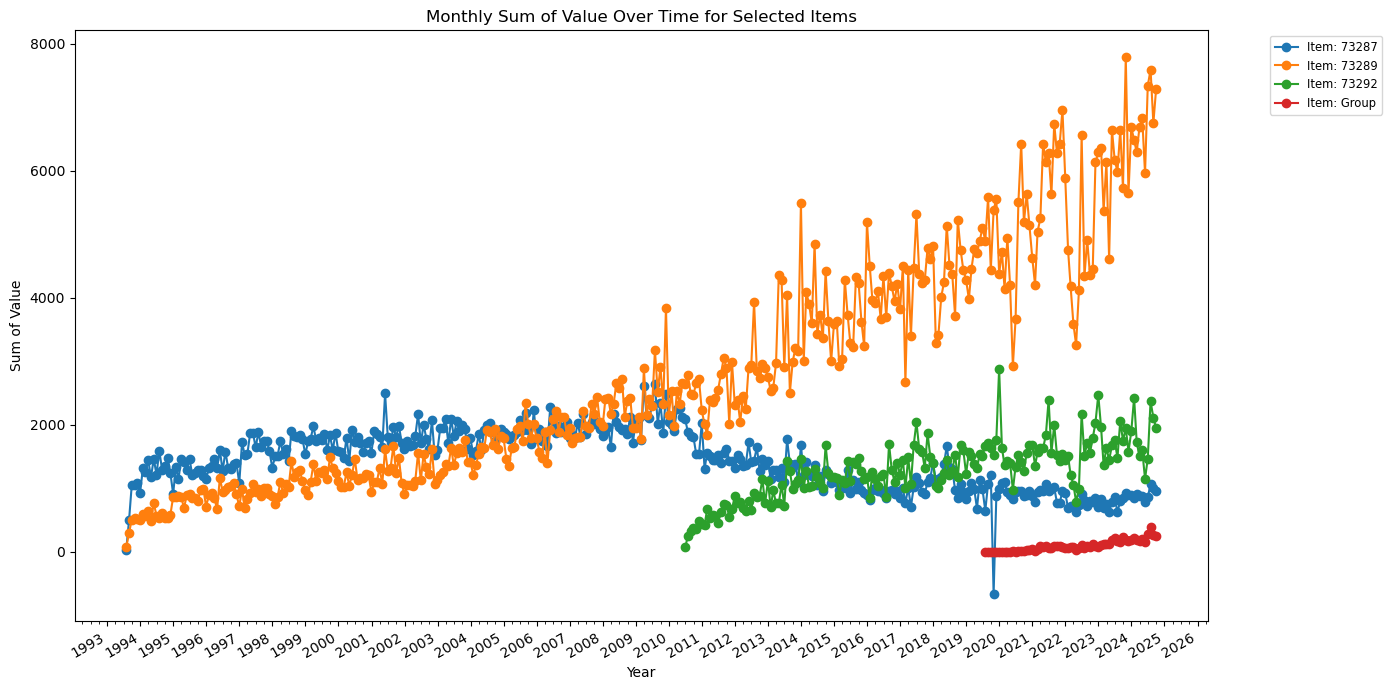

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73287', '73289', '73292', '73298', '73299',
    '73358', '73359', '73360', '73395', '73401',
    '73402', '73422', '73425', '73426', '73442',
    '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)]

# Rename the "Item" column values
items_to_keep = ['73287', '73289', '73292']
filtered_data['Item'] = filtered_data['Item'].apply(lambda x: x if x in items_to_keep else 'Group')

# Plotting all items on the same plot
plt.figure(figsize=(14, 7))

# Plot each unique item/group
for item in filtered_data['Item'].unique():
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum()
    plt.plot(item_data.index, item_data, marker='o', linestyle='-', label=f'Item: {item}')

# Setting title and labels
plt.title('Monthly Sum of Value Over Time for Selected Items')
plt.xlabel('Year')
plt.ylabel('Sum of Value')

# Set x-axis major locator to every year and minor locator to every quarter
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve display of x-axis labels
plt.gcf().autofmt_xdate()

# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

plt.tight_layout()
plt.show()


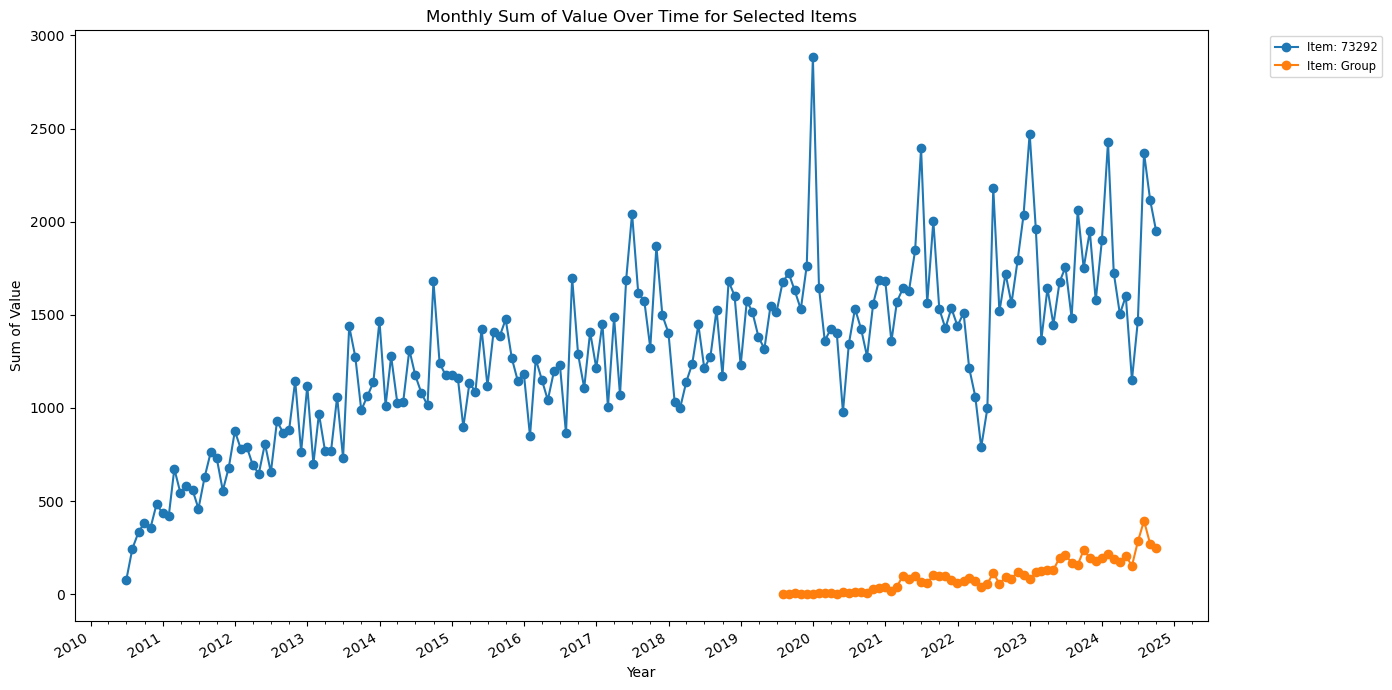

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299',
    '73358', '73359', '73360', '73395', '73401',
    '73402', '73422', '73425', '73426', '73442',
    '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Rename the "Item" column values
items_to_keep = ['73292']
filtered_data.loc[~filtered_data['Item'].isin(items_to_keep), 'Item'] = 'Group'

# Plotting all items on the same plot
plt.figure(figsize=(14, 7))

# Plot each unique item/group
for item in filtered_data['Item'].unique():
    item_data = filtered_data[filtered_data['Item'] == item]['Value'].resample('ME').sum()
    plt.plot(item_data.index, item_data, marker='o', linestyle='-', label=f'Item: {item}')

# Setting title and labels
plt.title('Monthly Sum of Value Over Time for Selected Items')
plt.xlabel('Year')
plt.ylabel('Sum of Value')

# Set x-axis major locator to every year and minor locator to every quarter
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve display of x-axis labels
plt.gcf().autofmt_xdate()

# Show legend
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

plt.tight_layout()
plt.show()


Percentage 'Group' represents of '73292' for each month:
Month
2019-07-31     0.059701
2019-08-31     0.116077
2019-09-30     0.429185
2019-10-31     0.065359
2019-11-30     0.170164
                ...    
2024-05-31    13.217391
2024-06-30    19.264806
2024-07-31    16.624473
2024-08-31    12.759924
2024-09-30    12.608919
Freq: ME, Name: Value, Length: 63, dtype: float64


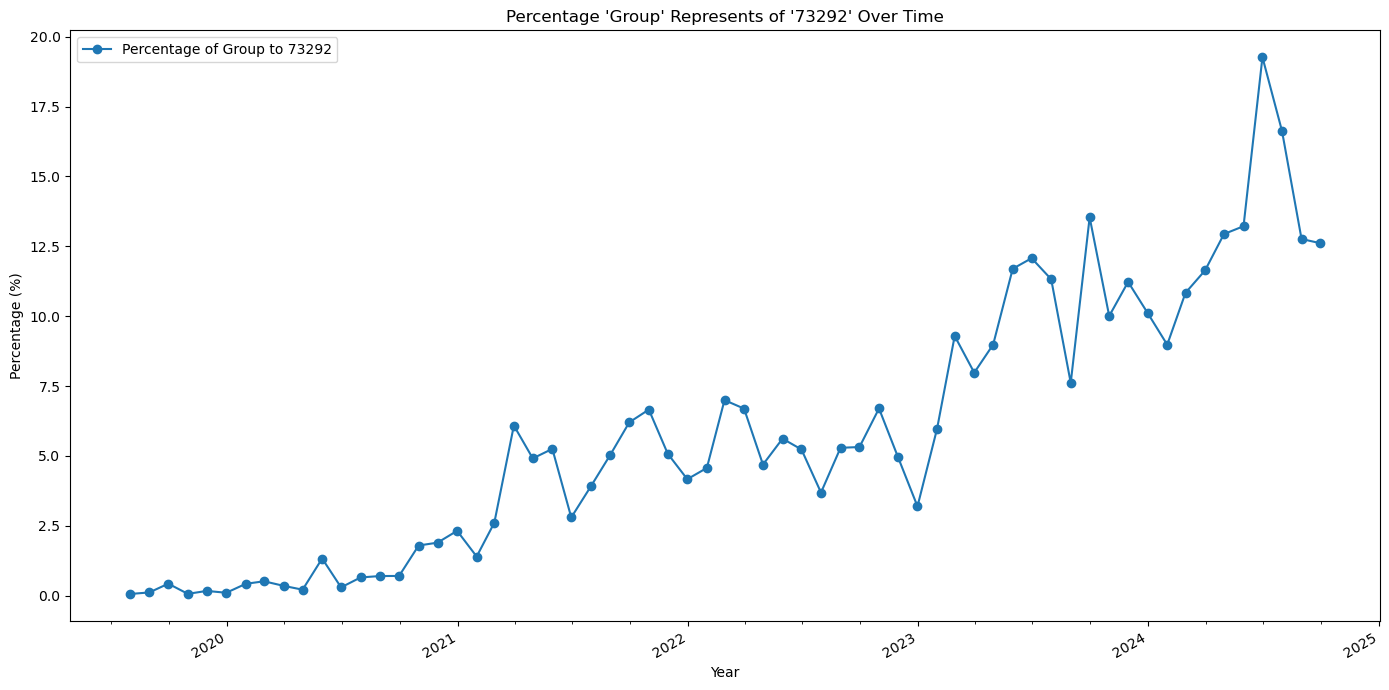

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299',
    '73358', '73359', '73360', '73395', '73401',
    '73402', '73422', '73425', '73426', '73442',
    '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Rename the "Item" column values
items_to_keep = ['73292']
filtered_data.loc[~filtered_data['Item'].isin(items_to_keep), 'Item'] = 'Group'

# Resample data by month-end for both "Group" and "73292"
group_data = filtered_data[filtered_data['Item'] == 'Group']['Value'].resample('ME').sum()
item_73292_data = filtered_data[filtered_data['Item'] == '73292']['Value'].resample('ME').sum()

# Calculate the percentage "Group" represents of "73292"
percentage_data = (group_data / item_73292_data) * 100

# Drop NaN values (in cases where either "Group" or "73292" has no data)
percentage_data = percentage_data.dropna()

# Display the calculated percentages
print("Percentage 'Group' represents of '73292' for each month:")
print(percentage_data)

# Plot the percentage data
plt.figure(figsize=(14, 7))
plt.plot(percentage_data.index, percentage_data, marker='o', linestyle='-', label='Percentage of Group to 73292')
plt.title("Percentage 'Group' Represents of '73292' Over Time")
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.legend()
plt.tight_layout()
plt.show()


### Diffusion Curve

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only "Group" and "73292"
filtered_data = data[data['Item'].isin(['Group', '73292'])].copy()

# Resample data by month-end
group_data = filtered_data[filtered_data['Item'] == 'Group']['Value'].resample('ME').sum().dropna()
item_73292_data = filtered_data[filtered_data['Item'] == '73292']['Value'].resample('ME').sum().dropna()

# Check if the data is non-empty
if group_data.empty or item_73292_data.empty:
    raise ValueError("The data series for 'Group' or '73292' is empty after resampling. Check your data and filters.")

# Create a time index for fitting models
time_index = np.arange(len(group_data))

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Fit models and calculate predictions
models = {
    "Logistic Diffusion": logistic_diffusion,
    "Gompertz": gompertz,
    "Bass Diffusion": bass_diffusion
}
model_fits = {}
results = {}

for model_name, model_func in models.items():
    try:
        params, _ = curve_fit(model_func, time_index, group_data, maxfev=10000)
        predicted = model_func(time_index, *params)
        r2 = r2_score(group_data, predicted)
        mae = mean_absolute_error(group_data, predicted)
        mape = mean_absolute_percentage_error(group_data, predicted)
        
        model_fits[model_name] = predicted
        results[model_name] = {'r2': r2, 'MAE': mae, 'MAPE': mape}
    except Exception as e:
        print(f"Error fitting {model_name}: {e}")
        continue

# Fit SARIMA model
try:
    sarima_model = SARIMAX(group_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_fit = sarima_model.fit(disp=False)
    sarima_pred = sarima_fit.fittedvalues
    sarima_r2 = r2_score(group_data, sarima_pred)
    sarima_mae = mean_absolute_error(group_data, sarima_pred)
    sarima_mape = mean_absolute_percentage_error(group_data, sarima_pred)
    
    model_fits["SARIMA"] = sarima_pred
    results["SARIMA"] = {'r2': sarima_r2, 'MAE': sarima_mae, 'MAPE': sarima_mape}
except Exception as e:
    print(f"Error fitting SARIMA: {e}")

# Select the best model
if results:
    best_model = min(results, key=lambda x: results[x]['MAE'])  # Selecting based on MAE as primary measure

    # Print the results
    print("Model Performance:")
    for model_name, metrics in results.items():
        print(f"{model_name}: r2={metrics['r2']:.4f}, MAE={metrics['MAE']:.4f}, MAPE={metrics['MAPE']:.4f}")

    print(f"\nBest Model: {best_model}")

    # Plot the actual vs predicted values for the best model
    plt.figure(figsize=(14, 7))
    plt.plot(group_data.index, group_data, label='Actual', marker='o')
    plt.plot(group_data.index, model_fits[best_model], label=f'Best Model: {best_model}', linestyle='--')
    plt.title('Actual vs Predicted Values for Group')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No valid model fits were found.")


ValueError: The data series for 'Group' or '73292' is empty after resampling. Check your data and filters.

In [42]:
print("Unique 'Item' values in the filtered data:", filtered_data['Item'].unique())


Unique 'Item' values in the filtered data: ['73292']


In [43]:
print("Filtered data preview:")
print(filtered_data.head())


Filtered data preview:
             Item State  Value
Month                         
2010-06-01  73292   NSW    8.0
2010-07-01  73292   NSW   64.0
2010-08-01  73292   NSW   88.0
2010-09-01  73292   NSW  116.0
2010-10-01  73292   NSW  103.0


In [44]:
print("\nData for 'Group' before resampling:")
print(filtered_data[filtered_data['Item'] == 'Group']['Value'])

print("\nData for '73292' before resampling:")
print(filtered_data[filtered_data['Item'] == '73292']['Value'])



Data for 'Group' before resampling:
Series([], Name: Value, dtype: float64)

Data for '73292' before resampling:
Month
2010-06-01      8.0
2010-07-01     64.0
2010-08-01     88.0
2010-09-01    116.0
2010-10-01    103.0
              ...  
2024-05-01      5.0
2024-06-01      8.0
2024-07-01     34.0
2024-08-01     26.0
2024-09-01     13.0
Name: Value, Length: 1376, dtype: float64


In [45]:
print("\nResampled data for 'Group':")
print(group_data)

print("\nResampled data for '73292':")
print(item_73292_data)



Resampled data for 'Group':
Series([], Freq: ME, Name: Value, dtype: float64)

Resampled data for '73292':
Month
2010-06-30      76.0
2010-07-31     245.0
2010-08-31     333.0
2010-09-30     384.0
2010-10-31     358.0
               ...  
2024-05-31    1150.0
2024-06-30    1469.0
2024-07-31    2370.0
2024-08-31    2116.0
2024-09-30    1951.0
Freq: ME, Name: Value, Length: 172, dtype: float64


/tmp/ipykernel_13832/4234875827.py:63: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/4234875827.py:47: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/4234875827.py:50: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/4234875827.py:50: RuntimeWarning:

invalid value encountered in divide



Model Performance:
Logistic Diffusion: r2=0.0000, MAE=68.0549, MAPE=7.6776
Gompertz: r2=0.8570, MAE=22.9789, MAPE=1.1279
Bass Diffusion: r2=0.8603, MAE=21.6853, MAPE=0.5769
SARIMA: r2=0.8168, MAE=23.2744, MAPE=0.4494

Best Model: Bass Diffusion


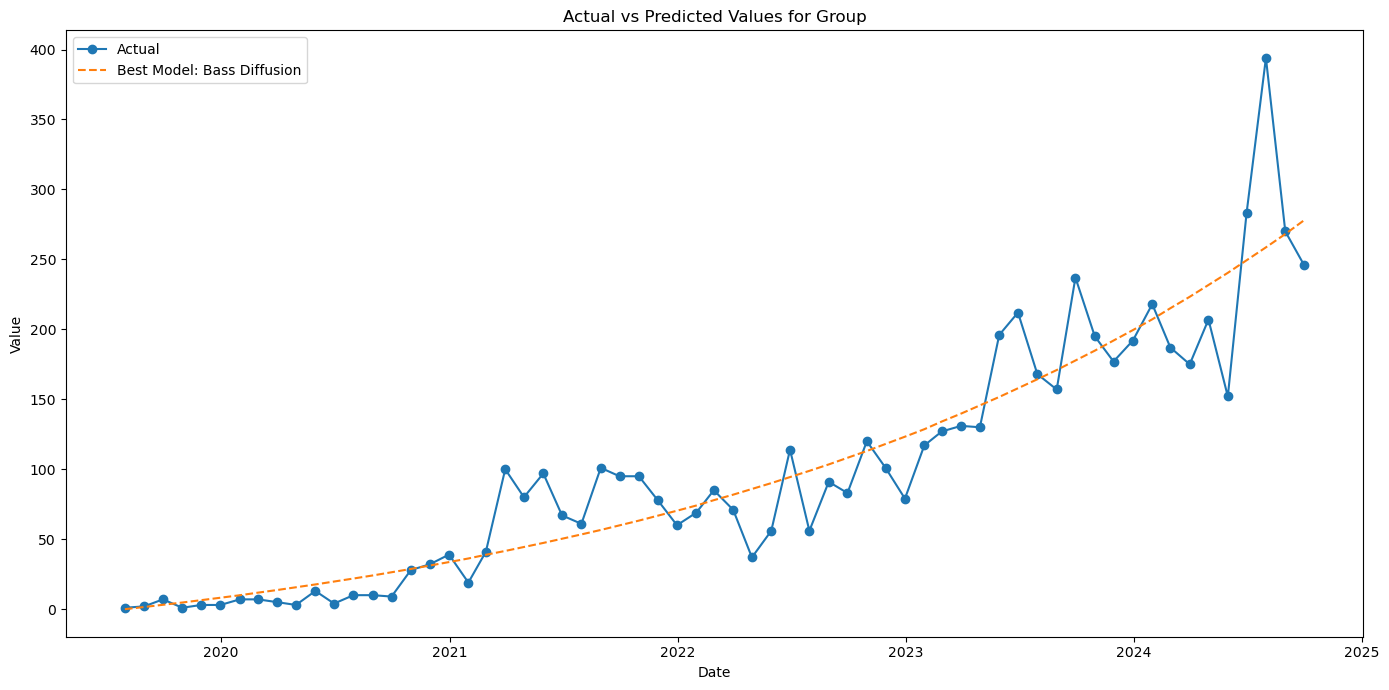

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Rename the "Item" column values
items_to_keep = ['73292']
filtered_data.loc[~filtered_data['Item'].isin(items_to_keep), 'Item'] = 'Group'

# Resample data by month-end for both "Group" and "73292"
group_data = filtered_data[filtered_data['Item'] == 'Group']['Value'].resample('ME').sum().dropna()
item_73292_data = filtered_data[filtered_data['Item'] == '73292']['Value'].resample('ME').sum().dropna()

# Check if the data is non-empty
if group_data.empty or item_73292_data.empty:
    raise ValueError("The data series for 'Group' or '73292' is empty after resampling. Check your data and filters.")

# Create a time index for fitting models
time_index = np.arange(len(group_data))

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Fit models and calculate predictions
models = {
    "Logistic Diffusion": logistic_diffusion,
    "Gompertz": gompertz,
    "Bass Diffusion": bass_diffusion
}
model_fits = {}
results = {}

for model_name, model_func in models.items():
    try:
        params, _ = curve_fit(model_func, time_index, group_data, maxfev=10000)
        predicted = model_func(time_index, *params)
        r2 = r2_score(group_data, predicted)
        mae = mean_absolute_error(group_data, predicted)
        mape = mean_absolute_percentage_error(group_data, predicted)
        
        model_fits[model_name] = predicted
        results[model_name] = {'r2': r2, 'MAE': mae, 'MAPE': mape}
    except Exception as e:
        print(f"Error fitting {model_name}: {e}")
        continue

# Fit SARIMA model
try:
    sarima_model = SARIMAX(group_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_fit = sarima_model.fit(disp=False)
    sarima_pred = sarima_fit.fittedvalues
    sarima_r2 = r2_score(group_data, sarima_pred)
    sarima_mae = mean_absolute_error(group_data, sarima_pred)
    sarima_mape = mean_absolute_percentage_error(group_data, sarima_pred)
    
    model_fits["SARIMA"] = sarima_pred
    results["SARIMA"] = {'r2': sarima_r2, 'MAE': sarima_mae, 'MAPE': sarima_mape}
except Exception as e:
    print(f"Error fitting SARIMA: {e}")

# Select the best model
if results:
    best_model = min(results, key=lambda x: results[x]['MAE'])  # Selecting based on MAE as primary measure

    # Print the results
    print("Model Performance:")
    for model_name, metrics in results.items():
        print(f"{model_name}: r2={metrics['r2']:.4f}, MAE={metrics['MAE']:.4f}, MAPE={metrics['MAPE']:.4f}")

    print(f"\nBest Model: {best_model}")

    # Plot the actual vs predicted values for the best model
    plt.figure(figsize=(14, 7))
    plt.plot(group_data.index, group_data, label='Actual', marker='o')
    plt.plot(group_data.index, model_fits[best_model], label=f'Best Model: {best_model}', linestyle='--')
    plt.title('Actual vs Predicted Values for Group')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No valid model fits were found.")


/tmp/ipykernel_13832/1385542753.py:65: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/1385542753.py:39: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/1385542753.py:42: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/1385542753.py:42: RuntimeWarning:

invalid value encountered in divide




Model Performance for 'Group':
Logistic Diffusion: r2=0.0000, MAE=68.0549, MAPE=7.6776
Gompertz: r2=0.8570, MAE=22.9789, MAPE=1.1279
Bass Diffusion: r2=0.8603, MAE=21.6853, MAPE=0.5769
SARIMA: r2=0.8168, MAE=23.2744, MAPE=0.4494

Best Model for 'Group': Bass Diffusion


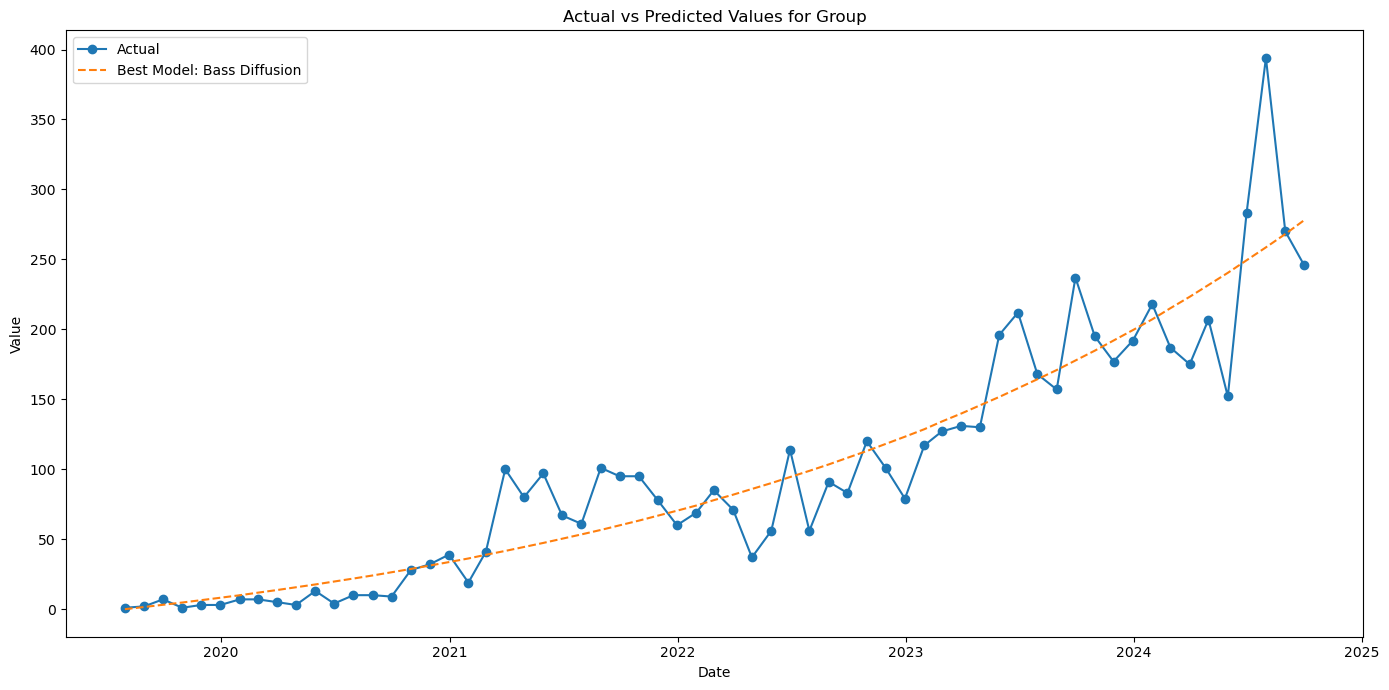

/tmp/ipykernel_13832/1385542753.py:65: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/1385542753.py:39: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/1385542753.py:65: OptimizeWarning:

Covariance of the parameters could not be estimated




Model Performance for '73292':
Logistic Diffusion: r2=0.0000, MAE=365.8081, MAPE=0.4760
Gompertz: r2=0.6449, MAE=197.2982, MAPE=0.1889
Bass Diffusion: r2=0.0397, MAE=359.1444, MAPE=0.3910
SARIMA: r2=0.6516, MAE=200.6829, MAPE=0.1701

Best Model for '73292': Gompertz


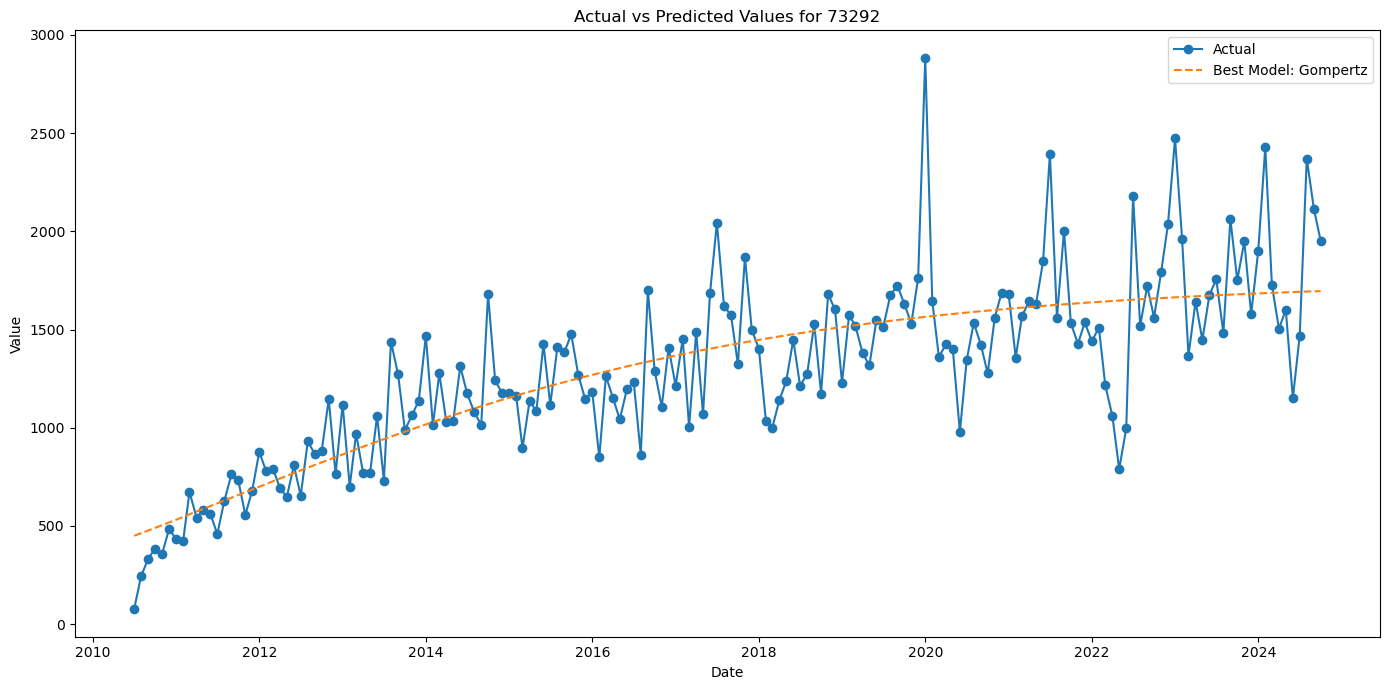

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Rename the "Item" column values
items_to_keep = ['73292']
filtered_data.loc[~filtered_data['Item'].isin(items_to_keep), 'Item'] = 'Group'

# List of items to fit models to
categories = ['Group', '73292']

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Fit models and evaluate for each category
for category in categories:
    category_data = filtered_data[filtered_data['Item'] == category]['Value'].resample('ME').sum().dropna()
    
    if category_data.empty:
        print(f"No data found for '{category}'. Skipping...")
        continue

    # Create a time index for fitting models
    time_index = np.arange(len(category_data))

    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }
    model_fits = {}
    results = {}

    for model_name, model_func in models.items():
        try:
            params, _ = curve_fit(model_func, time_index, category_data, maxfev=10000)
            predicted = model_func(time_index, *params)
            r2 = r2_score(category_data, predicted)
            mae = mean_absolute_error(category_data, predicted)
            mape = mean_absolute_percentage_error(category_data, predicted)
            
            model_fits[model_name] = predicted
            results[model_name] = {'r2': r2, 'MAE': mae, 'MAPE': mape}
        except Exception as e:
            print(f"Error fitting {model_name} for '{category}': {e}")
            continue

    # Fit SARIMA model
    try:
        sarima_model = SARIMAX(category_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        sarima_pred = sarima_fit.fittedvalues
        sarima_r2 = r2_score(category_data, sarima_pred)
        sarima_mae = mean_absolute_error(category_data, sarima_pred)
        sarima_mape = mean_absolute_percentage_error(category_data, sarima_pred)
        
        model_fits["SARIMA"] = sarima_pred
        results["SARIMA"] = {'r2': sarima_r2, 'MAE': sarima_mae, 'MAPE': sarima_mape}
    except Exception as e:
        print(f"Error fitting SARIMA for '{category}': {e}")

    # Select the best model
    if results:
        best_model = min(results, key=lambda x: results[x]['MAE'])  # Selecting based on MAE as primary measure

        # Print the results
        print(f"\nModel Performance for '{category}':")
        for model_name, metrics in results.items():
            print(f"{model_name}: r2={metrics['r2']:.4f}, MAE={metrics['MAE']:.4f}, MAPE={metrics['MAPE']:.4f}")

        print(f"\nBest Model for '{category}': {best_model}")

        # Plot the actual vs predicted values for the best model
        plt.figure(figsize=(14, 7))
        plt.plot(category_data.index, category_data, label='Actual', marker='o')
        plt.plot(category_data.index, model_fits[best_model], label=f'Best Model: {best_model}', linestyle='--')
        plt.title(f'Actual vs Predicted Values for {category}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid model fits were found for '{category}'.")


/tmp/ipykernel_13832/990516125.py:69: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/990516125.py:39: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/990516125.py:42: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/990516125.py:42: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_13832/990516125.py:69: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/990516125.py:39: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/990516125.py:69: OptimizeWarning:

Covariance of the parameters could not be estimated




Best Model for 'Group': Bass Diffusion with MAE=21.6853

Best Model for '73292': Gompertz with MAE=197.2982
The predicted intersection date is: 2029-04


/tmp/ipykernel_13832/990516125.py:100: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



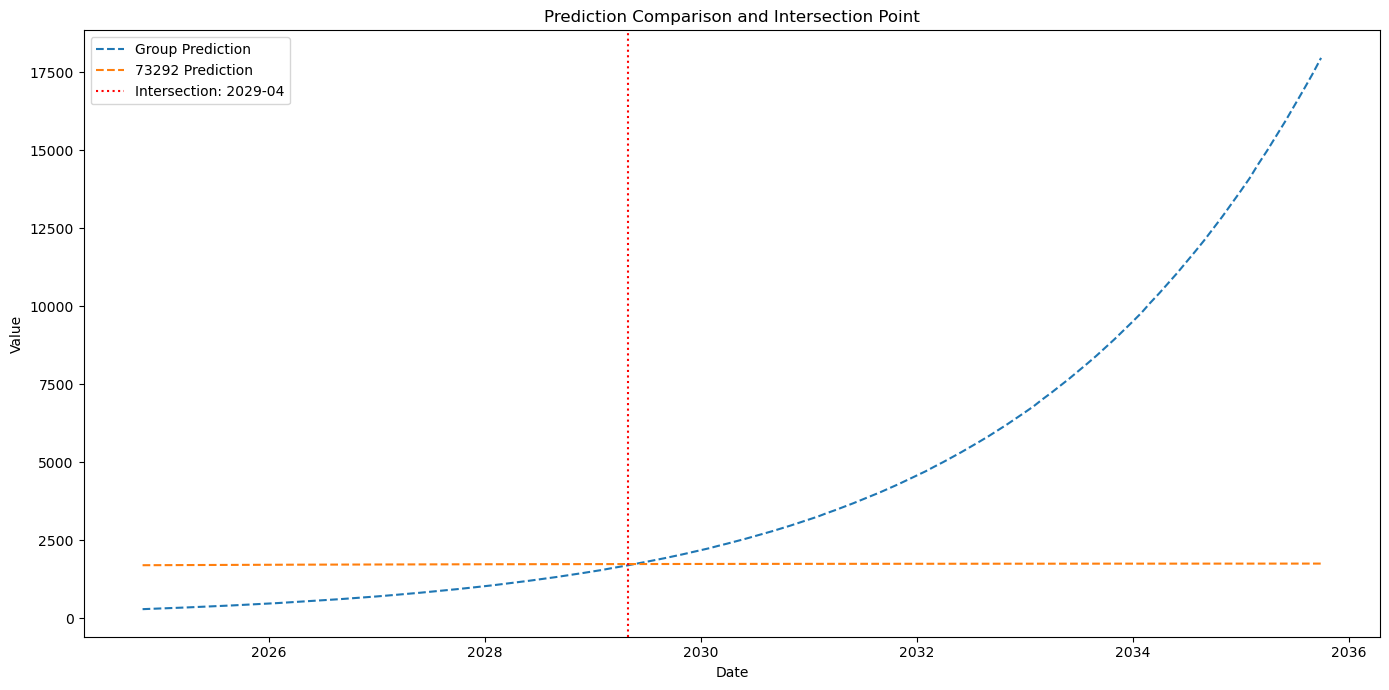

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Rename the "Item" column values
items_to_keep = ['73292']
filtered_data.loc[~filtered_data['Item'].isin(items_to_keep), 'Item'] = 'Group'

# List of items to fit models to
categories = ['Group', '73292']

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

model_predictions = {}

# Fit models, select the best for each category, and predict out to 2035
for category in categories:
    category_data = filtered_data[filtered_data['Item'] == category]['Value'].resample('ME').sum().dropna()
    
    if category_data.empty:
        print(f"No data found for '{category}'. Skipping...")
        continue

    # Create a time index for fitting models and extending predictions
    current_time_index = np.arange(len(category_data))
    future_time_index = np.arange(len(category_data), len(category_data) + (2035 - category_data.index[-1].year) * 12)

    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }
    best_model = None
    best_params = None
    results = {}

    for model_name, model_func in models.items():
        try:
            params, _ = curve_fit(model_func, current_time_index, category_data, maxfev=10000)
            predicted = model_func(current_time_index, *params)
            future_predicted = model_func(future_time_index, *params)
            mae = mean_absolute_error(category_data, predicted)
            results[model_name] = {'MAE': mae, 'params': params, 'future_predicted': future_predicted}
        except Exception as e:
            print(f"Error fitting {model_name} for '{category}': {e}")
            continue

    # Fit SARIMA model
    try:
        sarima_model = SARIMAX(category_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        sarima_future_pred = sarima_fit.get_forecast(steps=len(future_time_index)).predicted_mean
        sarima_mae = mean_absolute_error(category_data, sarima_fit.fittedvalues)
        results["SARIMA"] = {'MAE': sarima_mae, 'future_predicted': sarima_future_pred}
    except Exception as e:
        print(f"Error fitting SARIMA for '{category}': {e}")

    # Select the best model
    if results:
        best_model = min(results, key=lambda x: results[x]['MAE'])
        best_params = results[best_model]['params']
        model_predictions[category] = results[best_model]['future_predicted']

        print(f"\nBest Model for '{category}': {best_model} with MAE={results[best_model]['MAE']:.4f}")

# Calculate the intersection point between "Group" and "73292"
if 'Group' in model_predictions and '73292' in model_predictions:
    group_pred = model_predictions['Group']
    item_73292_pred = model_predictions['73292']
    future_index = pd.date_range(
        start=category_data.index[-1] + pd.offsets.MonthEnd(1),
        periods=len(future_time_index),
        freq='M'
    )
    intersection = np.where(np.diff(np.sign(group_pred - item_73292_pred)))[0]

    if intersection.size > 0:
        intersection_point = intersection[0]
        intersection_date = future_index[intersection_point]

        print(f"The predicted intersection date is: {intersection_date.strftime('%Y-%m')}")

        # Plot the intersection
        plt.figure(figsize=(14, 7))
        plt.plot(future_index, group_pred, label='Group Prediction', linestyle='--')
        plt.plot(future_index, item_73292_pred, label='73292 Prediction', linestyle='--')
        plt.axvline(intersection_date, color='red', linestyle=':', label=f'Intersection: {intersection_date.strftime("%Y-%m")}')
        plt.title('Prediction Comparison and Intersection Point')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No intersection found in the predicted range.")
else:
    print("Predictions for 'Group' or '73292' are not available.")


/tmp/ipykernel_13832/373509310.py:68: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/373509310.py:39: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/373509310.py:42: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/373509310.py:42: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_13832/373509310.py:68: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/373509310.py:39: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/373509310.py:68: OptimizeWarning:

Covariance of the parameters could not be estimated



The predicted intersection date is: 2029-04


/tmp/ipykernel_13832/373509310.py:100: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipykernel_13832/373509310.py:110: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipykernel_13832/373509310.py:112: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



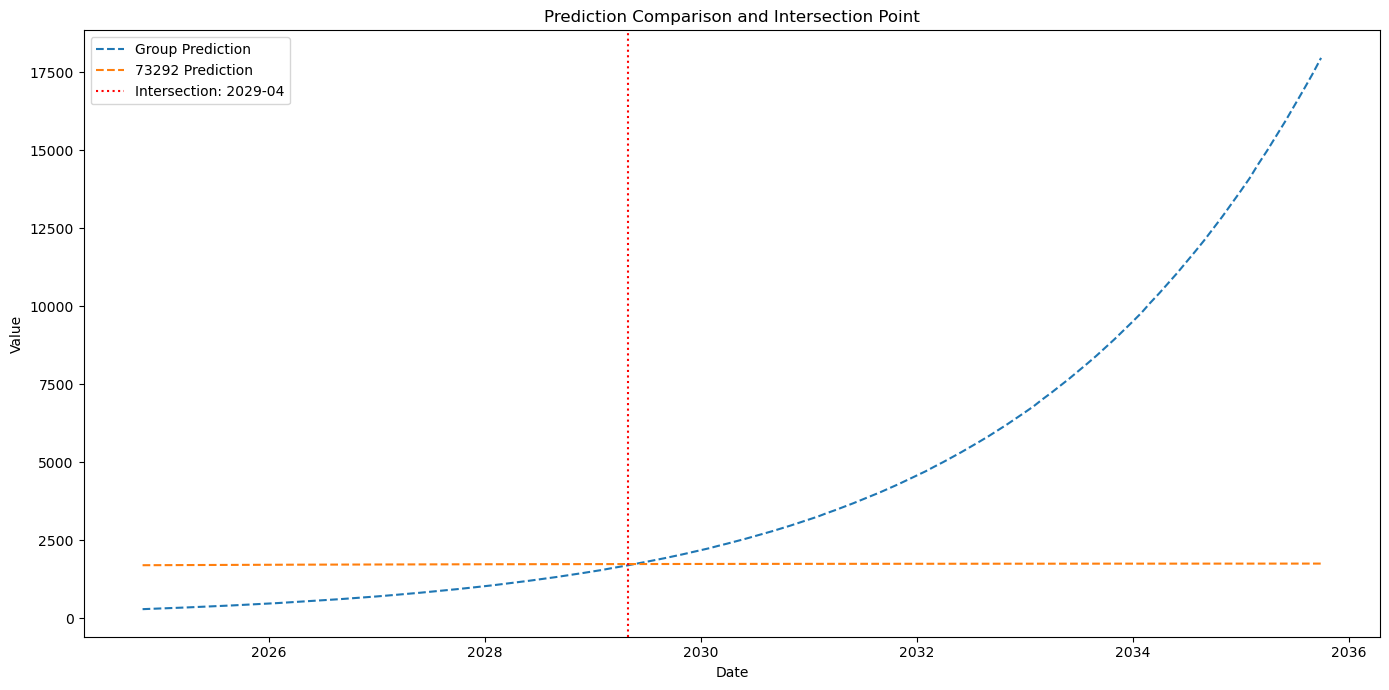

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Rename the "Item" column values
items_to_keep = ['73292']
filtered_data.loc[~filtered_data['Item'].isin(items_to_keep), 'Item'] = 'Group'

# List of items to fit models to
categories = ['Group', '73292']

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

model_predictions = {}

# Fit models, select the best for each category, and predict out to 2035
for category in categories:
    category_data = filtered_data[filtered_data['Item'] == category]['Value'].resample('ME').sum().dropna()
    
    if category_data.empty:
        print(f"No data found for '{category}'. Skipping...")
        continue

    # Create a time index for fitting models and extending predictions
    current_time_index = np.arange(len(category_data))
    future_time_index = np.arange(len(category_data), len(category_data) + (2035 - category_data.index[-1].year) * 12)

    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }
    best_model = None
    results = {}

    for model_name, model_func in models.items():
        try:
            params, _ = curve_fit(model_func, current_time_index, category_data, maxfev=10000)
            predicted = model_func(current_time_index, *params)
            future_predicted = model_func(future_time_index, *params)
            mae = mean_absolute_error(category_data, predicted)
            results[model_name] = {'MAE': mae, 'params': params, 'future_predicted': future_predicted}
        except Exception as e:
            print(f"Error fitting {model_name} for '{category}': {e}")
            continue

    # Fit SARIMA model
    try:
        sarima_model = SARIMAX(category_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        sarima_future_pred = sarima_fit.get_forecast(steps=len(future_time_index)).predicted_mean
        sarima_mae = mean_absolute_error(category_data, sarima_fit.fittedvalues)
        results["SARIMA"] = {'MAE': sarima_mae, 'future_predicted': sarima_future_pred}
    except Exception as e:
        print(f"Error fitting SARIMA for '{category}': {e}")

    # Select the best model
    if results:
        best_model = min(results, key=lambda x: results[x]['MAE'])
        model_predictions[category] = results[best_model]['future_predicted']

# Calculate the intersection point between "Group" and "73292"
if 'Group' in model_predictions and '73292' in model_predictions:
    group_pred = model_predictions['Group']
    item_73292_pred = model_predictions['73292']
    intersection = np.where(np.diff(np.sign(group_pred - item_73292_pred)))[0]

    if intersection.size > 0:
        intersection_point = intersection[0]
        intersection_date = pd.date_range(
            start=category_data.index[-1] + pd.offsets.MonthEnd(1),
            periods=len(future_time_index),
            freq='M'
        )[intersection_point]

        print(f"The predicted intersection date is: {intersection_date.strftime('%Y-%m')}")

        # Plot the intersection
        plt.figure(figsize=(14, 7))
        plt.plot(pd.date_range(start=category_data.index[-1] + pd.offsets.MonthEnd(1), periods=len(future_time_index), freq='M'),
                 group_pred, label='Group Prediction', linestyle='--')
        plt.plot(pd.date_range(start=category_data.index[-1] + pd.offsets.MonthEnd(1), periods=len(future_time_index), freq='M'),
                 item_73292_pred, label='73292 Prediction', linestyle='--')
        plt.axvline(intersection_date, color='red', linestyle=':', label=f'Intersection: {intersection_date.strftime("%Y-%m")}')
        plt.title('Prediction Comparison and Intersection Point')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No intersection found in the predicted range.")
else:
    print("Predictions for 'Group' or '73292' are not available.")


Bass diffusion model parameters for 'Group': [8.10739586e-07 3.04266069e-02 1.86415462e+06]
Gompertz model parameters for '73292': [1.75197750e+03 1.35997933e+00 2.18060096e-02]
The predicted intersection date is: 2029-04


/tmp/ipykernel_13832/3235435865.py:38: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/3235435865.py:38: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_13832/3235435865.py:35: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/3235435865.py:81: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



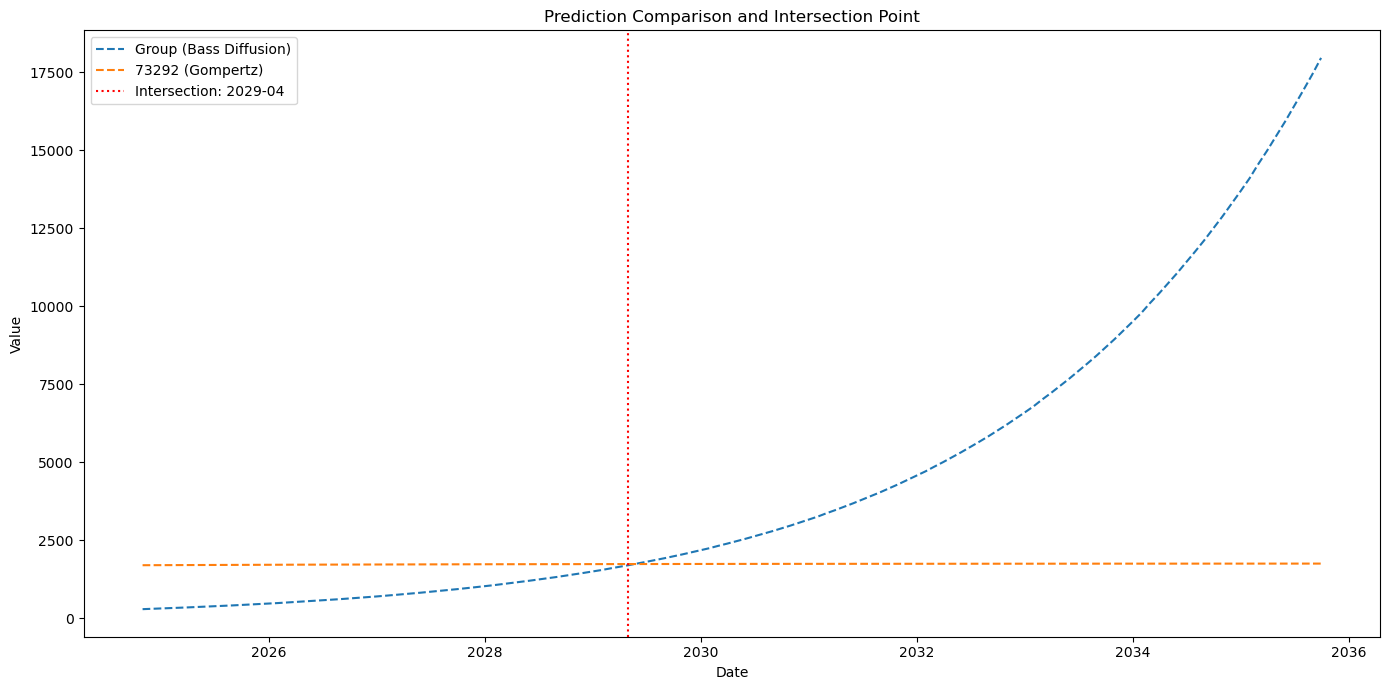

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Rename the "Item" column values
items_to_keep = ['73292']
filtered_data.loc[~filtered_data['Item'].isin(items_to_keep), 'Item'] = 'Group'

# List of items to fit models to
categories = ['Group', '73292']

# Define model functions
def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

model_predictions = {}

# Fit the specified models and predict out to 2035
for category in categories:
    category_data = filtered_data[filtered_data['Item'] == category]['Value'].resample('ME').sum().dropna()
    
    if category_data.empty:
        print(f"No data found for '{category}'. Skipping...")
        continue

    # Create a time index for fitting models and extending predictions
    current_time_index = np.arange(len(category_data))
    future_time_index = np.arange(len(category_data), len(category_data) + (2035 - category_data.index[-1].year) * 12)

    # Fit Gompertz curve for "73292" and Bass diffusion curve for "Group"
    if category == '73292':
        try:
            params, _ = curve_fit(gompertz, current_time_index, category_data, maxfev=10000)
            predicted = gompertz(current_time_index, *params)
            future_predicted = gompertz(future_time_index, *params)
            model_predictions[category] = future_predicted
            print(f"Gompertz model parameters for '73292': {params}")
        except Exception as e:
            print(f"Error fitting Gompertz model for '{category}': {e}")
            continue

    elif category == 'Group':
        try:
            params, _ = curve_fit(bass_diffusion, current_time_index, category_data, maxfev=10000)
            predicted = bass_diffusion(current_time_index, *params)
            future_predicted = bass_diffusion(future_time_index, *params)
            model_predictions[category] = future_predicted
            print(f"Bass diffusion model parameters for 'Group': {params}")
        except Exception as e:
            print(f"Error fitting Bass diffusion model for '{category}': {e}")
            continue

# Calculate the intersection point between "Group" and "73292"
if 'Group' in model_predictions and '73292' in model_predictions:
    group_pred = model_predictions['Group']
    item_73292_pred = model_predictions['73292']
    future_index = pd.date_range(
        start=category_data.index[-1] + pd.offsets.MonthEnd(1),
        periods=len(future_time_index),
        freq='M'
    )
    intersection = np.where(np.diff(np.sign(group_pred - item_73292_pred)))[0]

    if intersection.size > 0:
        intersection_point = intersection[0]
        intersection_date = future_index[intersection_point]

        print(f"The predicted intersection date is: {intersection_date.strftime('%Y-%m')}")

        # Plot the intersection
        plt.figure(figsize=(14, 7))
        plt.plot(future_index, group_pred, label='Group (Bass Diffusion)', linestyle='--')
        plt.plot(future_index, item_73292_pred, label='73292 (Gompertz)', linestyle='--')
        plt.axvline(intersection_date, color='red', linestyle=':', label=f'Intersection: {intersection_date.strftime("%Y-%m")}')
        plt.title('Prediction Comparison and Intersection Point')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No intersection found in the predicted range.")
else:
    print("Predictions for 'Group' or '73292' are not available.")


Model parameters for '73292': [1.75197750e+03 1.35997933e+00 2.18060096e-02]


/tmp/ipykernel_13832/1078508894.py:31: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/1078508894.py:58: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



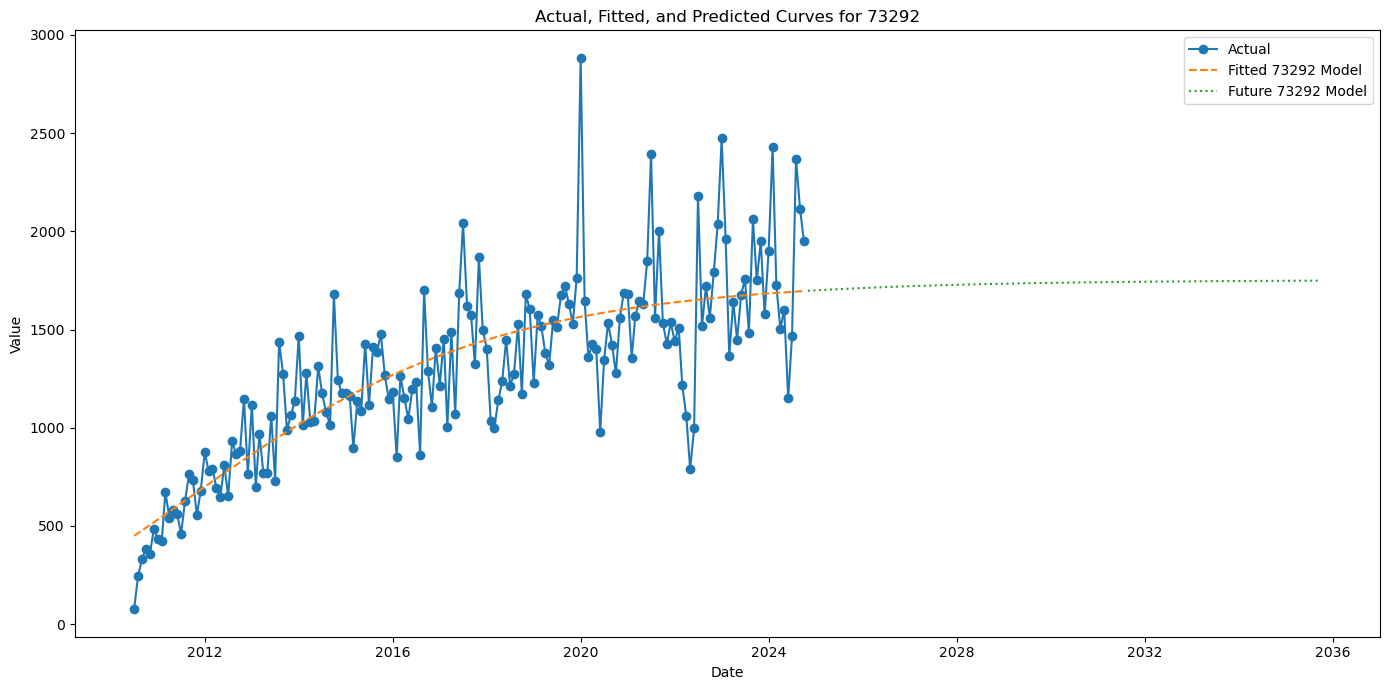

/tmp/ipykernel_13832/1078508894.py:34: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/1078508894.py:34: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_13832/1078508894.py:58: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Model parameters for 'Group': [8.10739586e-07 3.04266069e-02 1.86415462e+06]


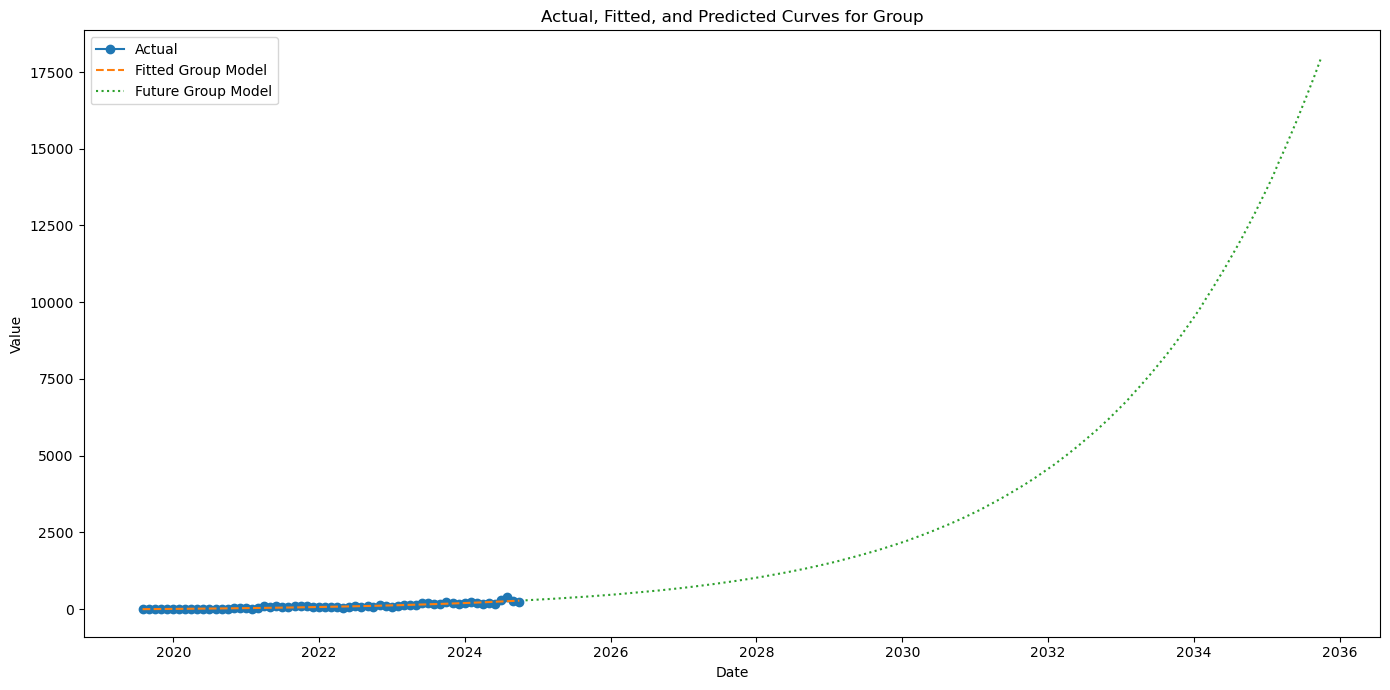

/tmp/ipykernel_13832/1078508894.py:85: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



The predicted intersection date is: 2029-04


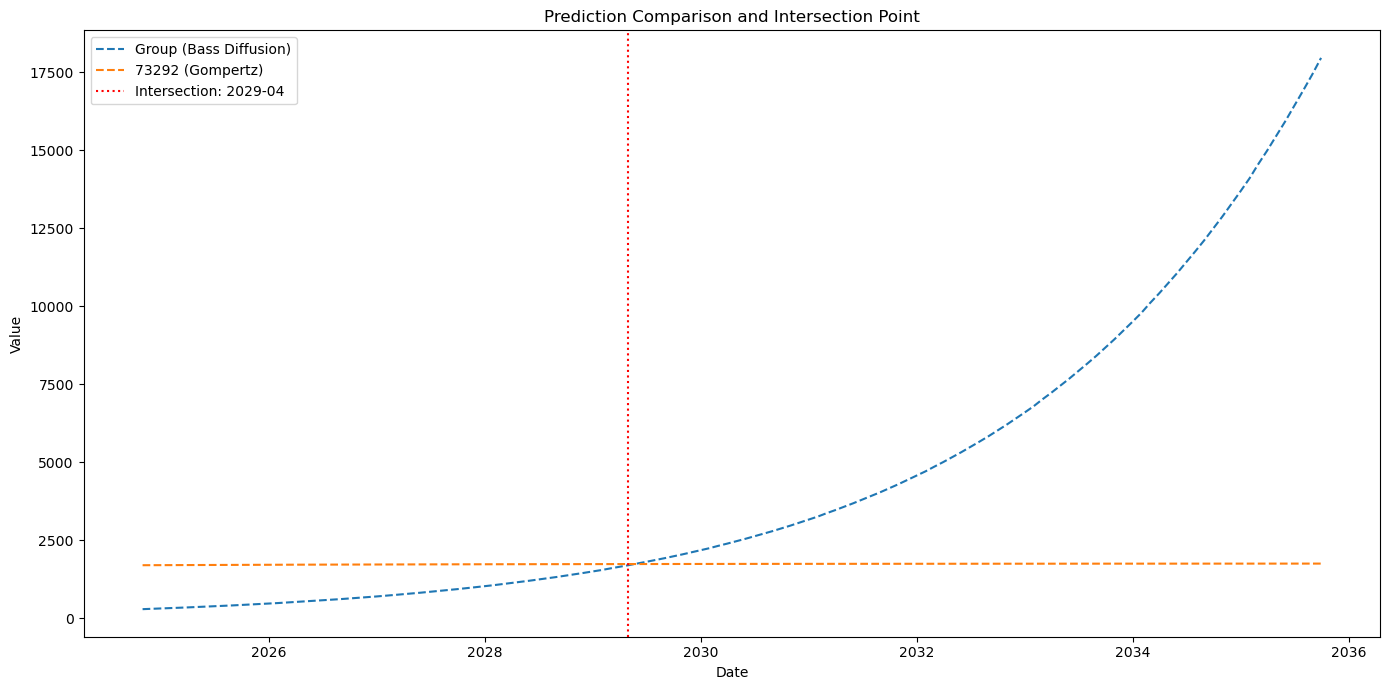

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73298', '73299', '73358', '73359',
    '73360', '73395', '73401', '73402', '73422',
    '73425', '73426', '73442', '73456', '73457', '73458'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Rename the "Item" column values
items_to_keep = ['73292']
filtered_data.loc[~filtered_data['Item'].isin(items_to_keep), 'Item'] = 'Group'

# Define model functions
def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Fit models and visualize the curves
for category, model_func in [('73292', gompertz), ('Group', bass_diffusion)]:
    category_data = filtered_data[filtered_data['Item'] == category]['Value'].resample('ME').sum().dropna()

    if category_data.empty:
        print(f"No data found for '{category}'. Skipping...")
        continue

    # Create a time index for fitting models and extending predictions
    current_time_index = np.arange(len(category_data))
    future_time_index = np.arange(len(category_data), len(category_data) + (2035 - category_data.index[-1].year) * 12)

    try:
        # Fit the model to the actual data
        params, _ = curve_fit(model_func, current_time_index, category_data, maxfev=10000)
        fitted_curve = model_func(current_time_index, *params)
        future_curve = model_func(future_time_index, *params)
        
        # Print model parameters for verification
        print(f"Model parameters for '{category}': {params}")

        # Create future date range for visualization
        future_dates = pd.date_range(
            start=category_data.index[-1] + pd.offsets.MonthEnd(1),
            periods=len(future_time_index),
            freq='M'
        )

        # Plot the fitted and future curves
        plt.figure(figsize=(14, 7))
        plt.plot(category_data.index, category_data, label='Actual', marker='o')
        plt.plot(category_data.index, fitted_curve, label=f'Fitted {category} Model', linestyle='--')
        plt.plot(future_dates, future_curve, label=f'Future {category} Model', linestyle=':')
        plt.title(f'Actual, Fitted, and Predicted Curves for {category}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Save the prediction for intersection analysis
        model_predictions[category] = future_curve
    except Exception as e:
        print(f"Error fitting {model_func.__name__} for '{category}': {e}")

# Calculate the intersection point between "Group" and "73292"
if 'Group' in model_predictions and '73292' in model_predictions:
    group_pred = model_predictions['Group']
    item_73292_pred = model_predictions['73292']
    future_index = pd.date_range(
        start=category_data.index[-1] + pd.offsets.MonthEnd(1),
        periods=len(future_time_index),
        freq='M'
    )
    intersection = np.where(np.diff(np.sign(group_pred - item_73292_pred)))[0]

    if intersection.size > 0:
        intersection_point = intersection[0]
        intersection_date = future_index[intersection_point]

        print(f"The predicted intersection date is: {intersection_date.strftime('%Y-%m')}")

        # Plot the intersection
        plt.figure(figsize=(14, 7))
        plt.plot(future_index, group_pred, label='Group (Bass Diffusion)', linestyle='--')
        plt.plot(future_index, item_73292_pred, label='73292 (Gompertz)', linestyle='--')
        plt.axvline(intersection_date, color='red', linestyle=':', label=f'Intersection: {intersection_date.strftime("%Y-%m")}')
        plt.title('Prediction Comparison and Intersection Point')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No intersection found in the predicted range.")
else:
    print("Predictions for 'Group' or '73292' are not available.")


### Group 2

/tmp/ipykernel_13832/901432670.py:64: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/901432670.py:38: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/901432670.py:41: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/901432670.py:41: RuntimeWarning:

invalid value encountered in divide

/home/doughnut/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/doughnut/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model Performance for 'Group':
Logistic Diffusion: r2=0.0000, MAE=22.1938, MAPE=2.4509
Gompertz: r2=0.5230, MAE=15.3946, MAPE=0.3877
Bass Diffusion: r2=0.5230, MAE=15.3945, MAPE=0.3877
SARIMA: r2=-0.0641, MAE=22.2282, MAPE=0.4460

Best Model for 'Group': Bass Diffusion


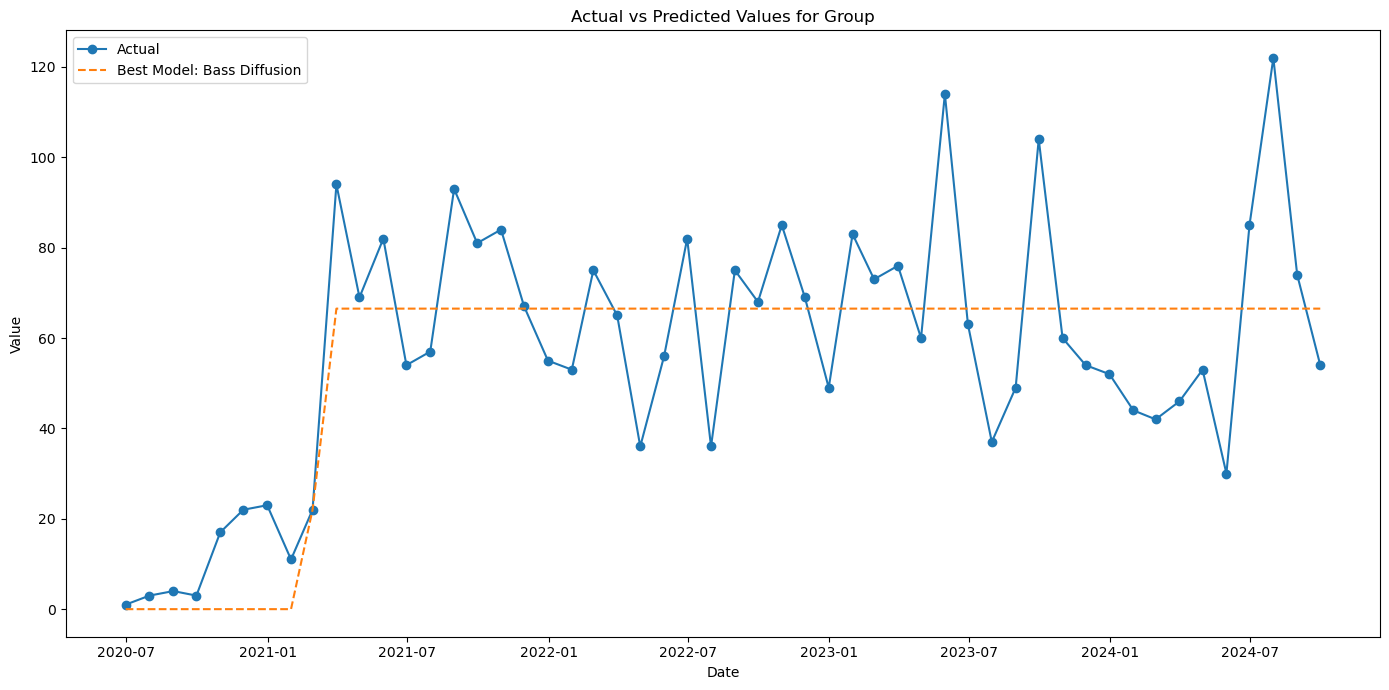

/tmp/ipykernel_13832/901432670.py:64: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/901432670.py:38: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/901432670.py:64: OptimizeWarning:

Covariance of the parameters could not be estimated




Model Performance for '73292':
Logistic Diffusion: r2=0.0000, MAE=365.8081, MAPE=0.4760
Gompertz: r2=0.6449, MAE=197.2982, MAPE=0.1889
Bass Diffusion: r2=0.0397, MAE=359.1444, MAPE=0.3910
SARIMA: r2=0.6516, MAE=200.6829, MAPE=0.1701

Best Model for '73292': Gompertz


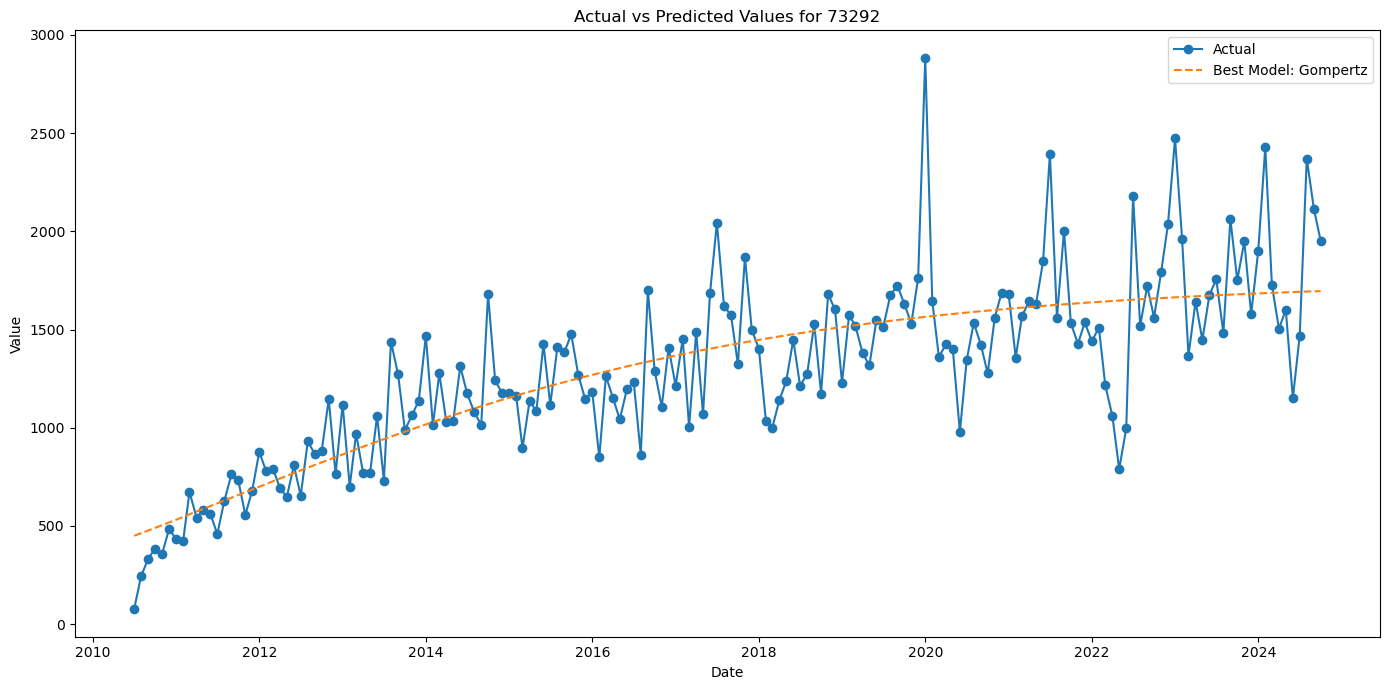

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = [
    '73292', '73358', '73359',
    '73360'
]
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Rename the "Item" column values
items_to_keep = ['73292']
filtered_data.loc[~filtered_data['Item'].isin(items_to_keep), 'Item'] = 'Group'

# List of items to fit models to
categories = ['Group', '73292']

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Fit models and evaluate for each category
for category in categories:
    category_data = filtered_data[filtered_data['Item'] == category]['Value'].resample('ME').sum().dropna()
    
    if category_data.empty:
        print(f"No data found for '{category}'. Skipping...")
        continue

    # Create a time index for fitting models
    time_index = np.arange(len(category_data))

    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }
    model_fits = {}
    results = {}

    for model_name, model_func in models.items():
        try:
            params, _ = curve_fit(model_func, time_index, category_data, maxfev=10000)
            predicted = model_func(time_index, *params)
            r2 = r2_score(category_data, predicted)
            mae = mean_absolute_error(category_data, predicted)
            mape = mean_absolute_percentage_error(category_data, predicted)
            
            model_fits[model_name] = predicted
            results[model_name] = {'r2': r2, 'MAE': mae, 'MAPE': mape}
        except Exception as e:
            print(f"Error fitting {model_name} for '{category}': {e}")
            continue

    # Fit SARIMA model
    try:
        sarima_model = SARIMAX(category_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit(disp=False)
        sarima_pred = sarima_fit.fittedvalues
        sarima_r2 = r2_score(category_data, sarima_pred)
        sarima_mae = mean_absolute_error(category_data, sarima_pred)
        sarima_mape = mean_absolute_percentage_error(category_data, sarima_pred)
        
        model_fits["SARIMA"] = sarima_pred
        results["SARIMA"] = {'r2': sarima_r2, 'MAE': sarima_mae, 'MAPE': sarima_mape}
    except Exception as e:
        print(f"Error fitting SARIMA for '{category}': {e}")

    # Select the best model
    if results:
        best_model = min(results, key=lambda x: results[x]['MAE'])  # Selecting based on MAE as primary measure

        # Print the results
        print(f"\nModel Performance for '{category}':")
        for model_name, metrics in results.items():
            print(f"{model_name}: r2={metrics['r2']:.4f}, MAE={metrics['MAE']:.4f}, MAPE={metrics['MAPE']:.4f}")

        print(f"\nBest Model for '{category}': {best_model}")

        # Plot the actual vs predicted values for the best model
        plt.figure(figsize=(14, 7))
        plt.plot(category_data.index, category_data, label='Actual', marker='o')
        plt.plot(category_data.index, model_fits[best_model], label=f'Best Model: {best_model}', linestyle='--')
        plt.title(f'Actual vs Predicted Values for {category}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid model fits were found for '{category}'.")



Best Model for 'Group': Bass Diffusion with MAE=15.3945

Best Model for '73292': Gompertz with MAE=197.2982
No intersection found in the predicted range.


/tmp/ipykernel_13832/1849690743.py:66: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/1849690743.py:32: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/1849690743.py:35: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/1849690743.py:38: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/1849690743.py:38: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_13832/1849690743.py:66: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/1849690743.py:35: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_13832/1849690743.py:66: OptimizeWarning:

Covariance of the parameters could not be estimated

/tmp/ipykernel_13832/1849690743.py:87: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



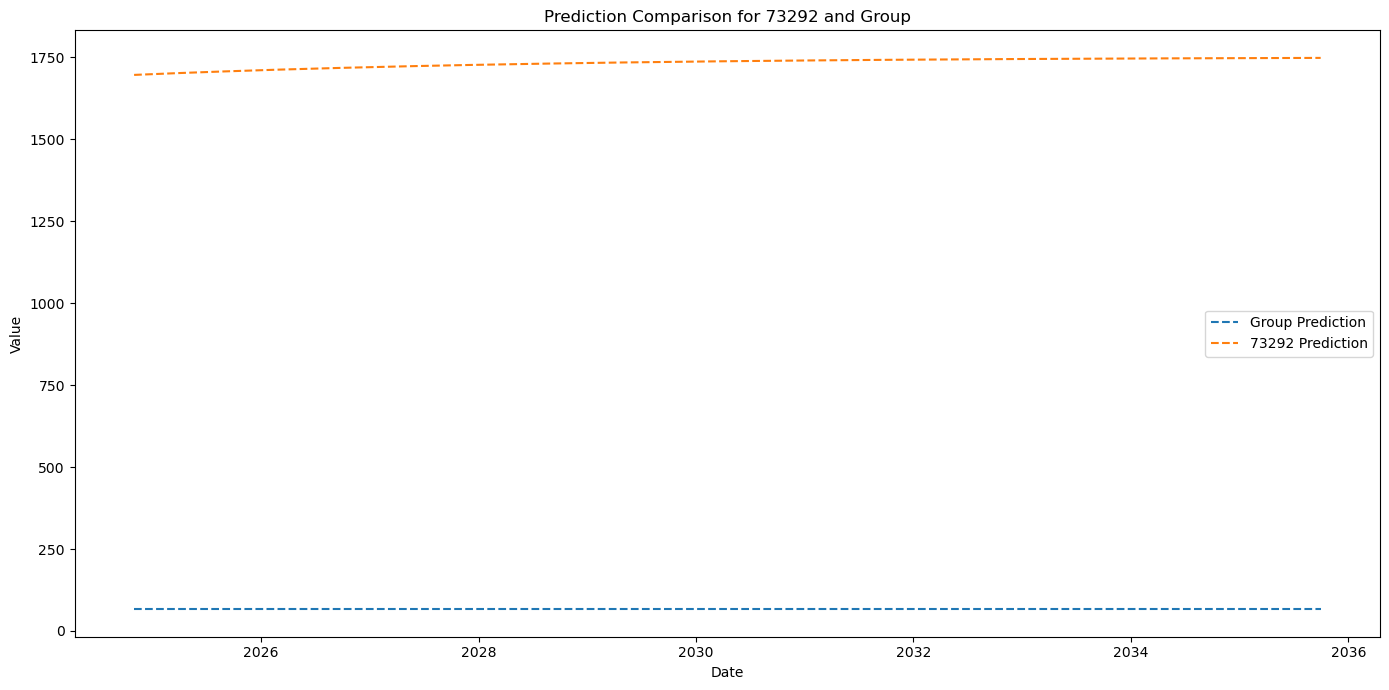

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Load the data (use your own path as needed)
file_path = "/mnt/c/Users/doughnut/OneDrive - The University of Melbourne/Phase 1 - Study 4 - Australian Genetic and Genomic Test Utilisation/MBSGeneticsBenefit_202410.feather"
data = pd.read_feather(file_path)

# Strip whitespace from the "Item" column
data['Item'] = data['Item'].astype(str).str.strip()

# Ensure the "Month" column is treated as datetime and set as index
data['Month'] = pd.to_datetime(data['Month']).dt.to_period('M').dt.to_timestamp()
data.set_index('Month', inplace=True)

# Filter the data to include only specific "Item" categories
items_to_include = ['73292', '73358', '73359', '73360']
filtered_data = data[data['Item'].isin(items_to_include)].copy()

# Rename the "Item" column values to group smaller items together
items_to_keep = ['73292']
filtered_data.loc[~filtered_data['Item'].isin(items_to_keep), 'Item'] = 'Group'

# List of categories to fit models to
categories = ['Group', '73292']

# Define model functions
def logistic_diffusion(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

def gompertz(t, a, b, c):
    return a * np.exp(-b * np.exp(-c * t))

def bass_diffusion(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

model_predictions = {}

# Fit models, select the best for each category, and predict out to 2035
for category in categories:
    category_data = filtered_data[filtered_data['Item'] == category]['Value'].resample('ME').sum().dropna()

    if category_data.empty:
        print(f"No data found for '{category}'. Skipping...")
        continue

    # Create a time index for fitting models and extending predictions
    current_time_index = np.arange(len(category_data))
    future_time_index = np.arange(len(category_data), len(category_data) + (2035 - category_data.index[-1].year) * 12)

    # Fit models and calculate predictions
    models = {
        "Logistic Diffusion": logistic_diffusion,
        "Gompertz": gompertz,
        "Bass Diffusion": bass_diffusion
    }
    best_model = None
    best_params = None
    results = {}

    for model_name, model_func in models.items():
        try:
            params, _ = curve_fit(model_func, current_time_index, category_data, maxfev=10000)
            predicted = model_func(current_time_index, *params)
            future_predicted = model_func(future_time_index, *params)
            mae = mean_absolute_error(category_data, predicted)
            results[model_name] = {'MAE': mae, 'params': params, 'future_predicted': future_predicted}
        except Exception as e:
            print(f"Error fitting {model_name} for '{category}': {e}")
            continue

    # Select the best model based on MAE
    if results:
        best_model = min(results, key=lambda x: results[x]['MAE'])
        model_predictions[category] = results[best_model]['future_predicted']
        print(f"\nBest Model for '{category}': {best_model} with MAE={results[best_model]['MAE']:.4f}")
    else:
        print(f"No valid models found for '{category}'.")

# Calculate the intersection point between "Group" and "73292"
if 'Group' in model_predictions and '73292' in model_predictions:
    group_pred = model_predictions['Group']
    item_73292_pred = model_predictions['73292']
    future_index = pd.date_range(
        start=category_data.index[-1] + pd.offsets.MonthEnd(1),
        periods=len(future_time_index),
        freq='M'
    )
    intersection = np.where(np.diff(np.sign(group_pred - item_73292_pred)))[0]

    plt.figure(figsize=(14, 7))
    plt.plot(future_index, group_pred, label='Group Prediction', linestyle='--')
    plt.plot(future_index, item_73292_pred, label='73292 Prediction', linestyle='--')

    if intersection.size > 0:
        intersection_point = intersection[0]
        intersection_date = future_index[intersection_point]
        plt.axvline(intersection_date, color='red', linestyle=':', label=f'Intersection: {intersection_date.strftime("%Y-%m")}')
        print(f"The predicted intersection date is: {intersection_date.strftime('%Y-%m')}")
    else:
        print("No intersection found in the predicted range.")

    plt.title('Prediction Comparison for 73292 and Group')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Predictions for 'Group' or '73292' are not available.")
